# Lab 5
Goal: *"We are going to use a set of training datasets to optimize event selections in order to enhance the discovery sensitivity. The optimal event selections will be applied to a selected pseudo-experiment data."*  
Plan: 
1) Read the data instructions
    - Get the data into a notebook where I can begin plotting different things
    - Get know the data: 
        - What are it's dimensions? 
        - What do each of the columns contain?
        - How large is it?
        - Whats the difference between the QCD file (background) and Higgs file (signal)
2) Read about the data: 
    - Read the papers linked to help figure out what the hell all of the data means!
3) Start drafting the report: 
    - Answers to questions on the data instructions AFTER having read how to do the analysis: 
4) A finished lab report will address the following: 
    - Do all of the features provide discrimination power between signal and background?
    - Are there correlations among these features?
    - Compute the expected discovery sensitivity (significance of the expected signal) by normalizing each sample appropriately (see 'expected yields' below).
    - Develop a plan to optimize the discovery sensitivity by applying selections to these features.


## 1 
The data contains 14 features: Each sample contains 14 features: ‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR' 


In [1]:
#Import the library
import pickle

In [5]:
# open the file of interest and use pickle loading
infile = open ("qcd_100000_pt_250_500.pkl", 'rb')
new_dict = pickle.load(infile)

# List all the keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [6]:
# Print two variables, mass and d2, of the first 10 jets
for i in range(10):
    print(new_dict['mass'][i],new_dict['d2'][i])

125.29872026896659 3.304886302915122
88.0470543065784 2.4390891450626166
85.79417445424248 4.118371457491606
42.94732814665354 8.038338215316234
59.54222652643443 6.353842223846714
52.25202892050295 35.22466496007628
87.72005721179889 3.8934825497044394
59.648628855244354 8.789222507192793
74.23631116158323 3.2765540773471997
41.90450338556174 26.87568501726949


In [8]:
import matplotlib
import matplotlib.pyplot as plt

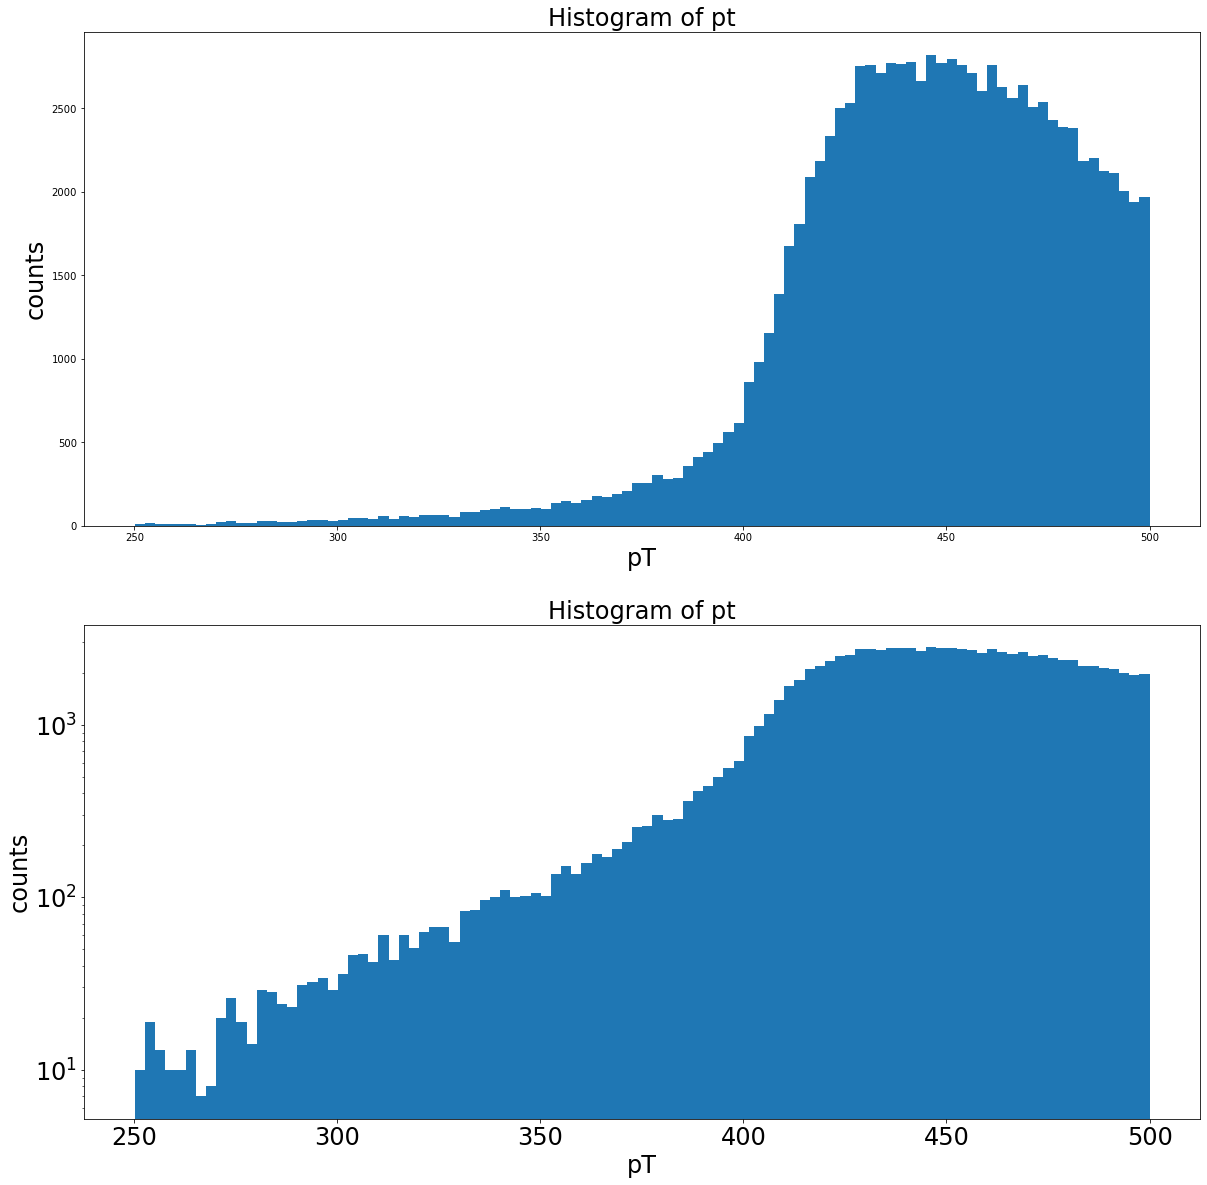

In [22]:
fig, ax = plt.subplots(2,1, figsize = (20,20))
plt.tick_params(labelsize = 24)
ax[1].set_yscale('log')

for i in range(2):
    ax[i].hist(new_dict['pt'][:], 100)
    ax[i].set_title('Histogram of pt', fontsize = 24)
    ax[i].set_xlabel('pT', fontsize = 24)
    ax[i].set_ylabel('counts', fontsize = 24)

Look the above is a histogram of the pT. It extends from 250 to 500. It isnt' an analytic distribution that looks familiar.

In [34]:
# Define a function to create the same two histograms as above for all of the data.
def makeHists(data, name, bins):
    """
    Create a histogram and a semiLog histogram for some imput data that looks like
    the plots above
    
    bins: the number of bins
    
    data: The data to be histogrammed
    
    Name: a string, the name of the column to be histogrammed
    """
    fig, ax = plt.subplots(2,1, figsize = (20,20))
    ax[1].set_yscale('log')

    for i in range(2):
        ax[i].hist(data, bins)
        ax[i].set_title(f'Histogram of {name}', fontsize = 24)
        ax[i].set_xlabel(f'{name}', fontsize = 24)
        ax[i].set_ylabel('counts', fontsize = 24)
        

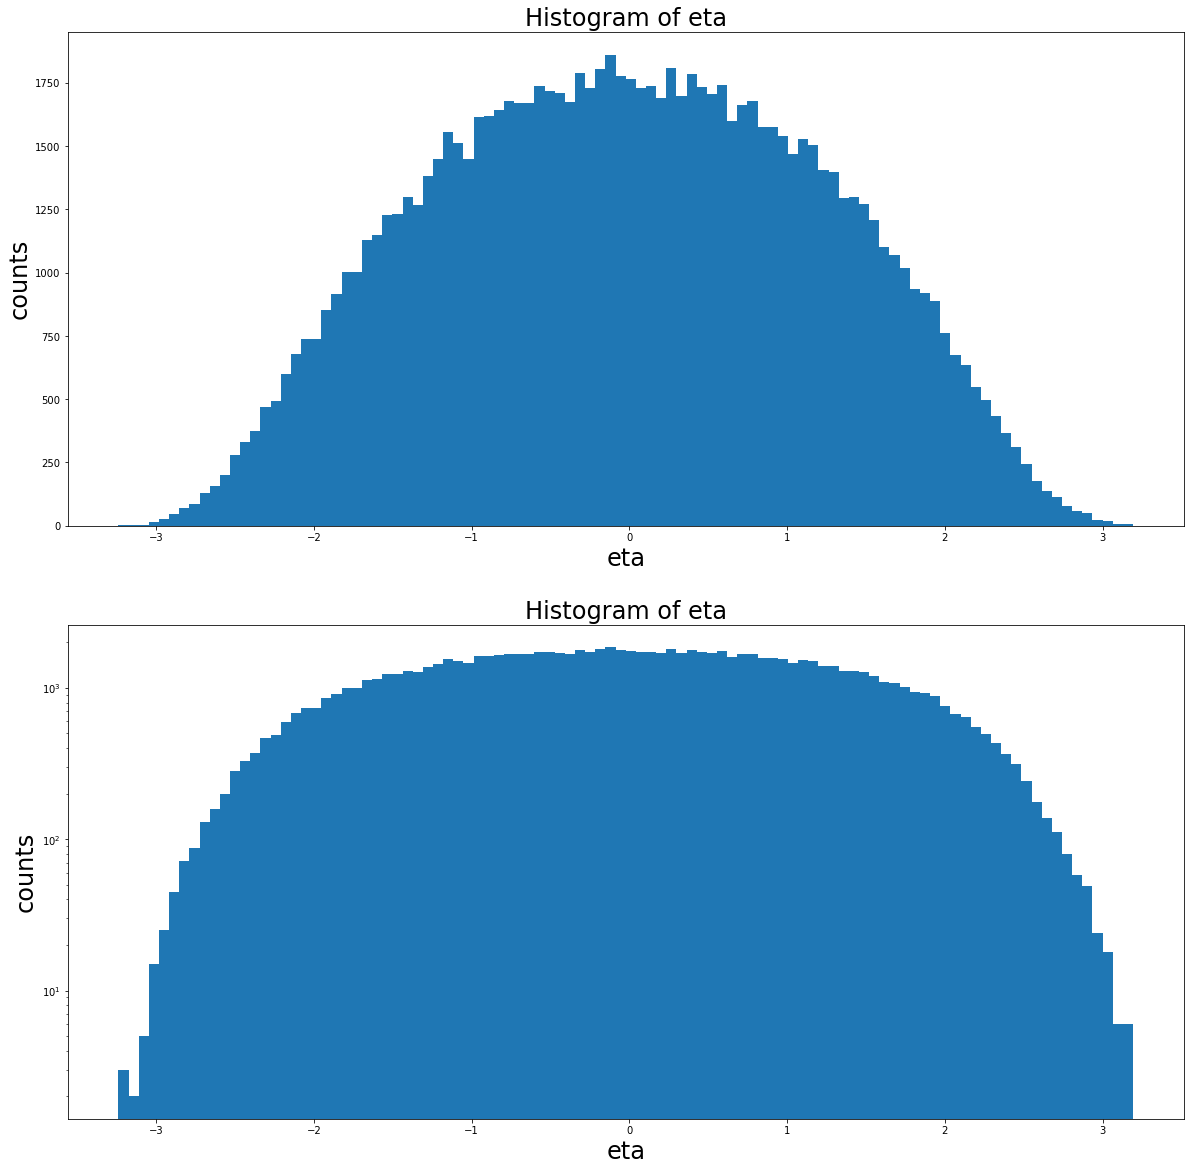

In [37]:

makeHists(new_dict['eta'][:], 'eta', 100)

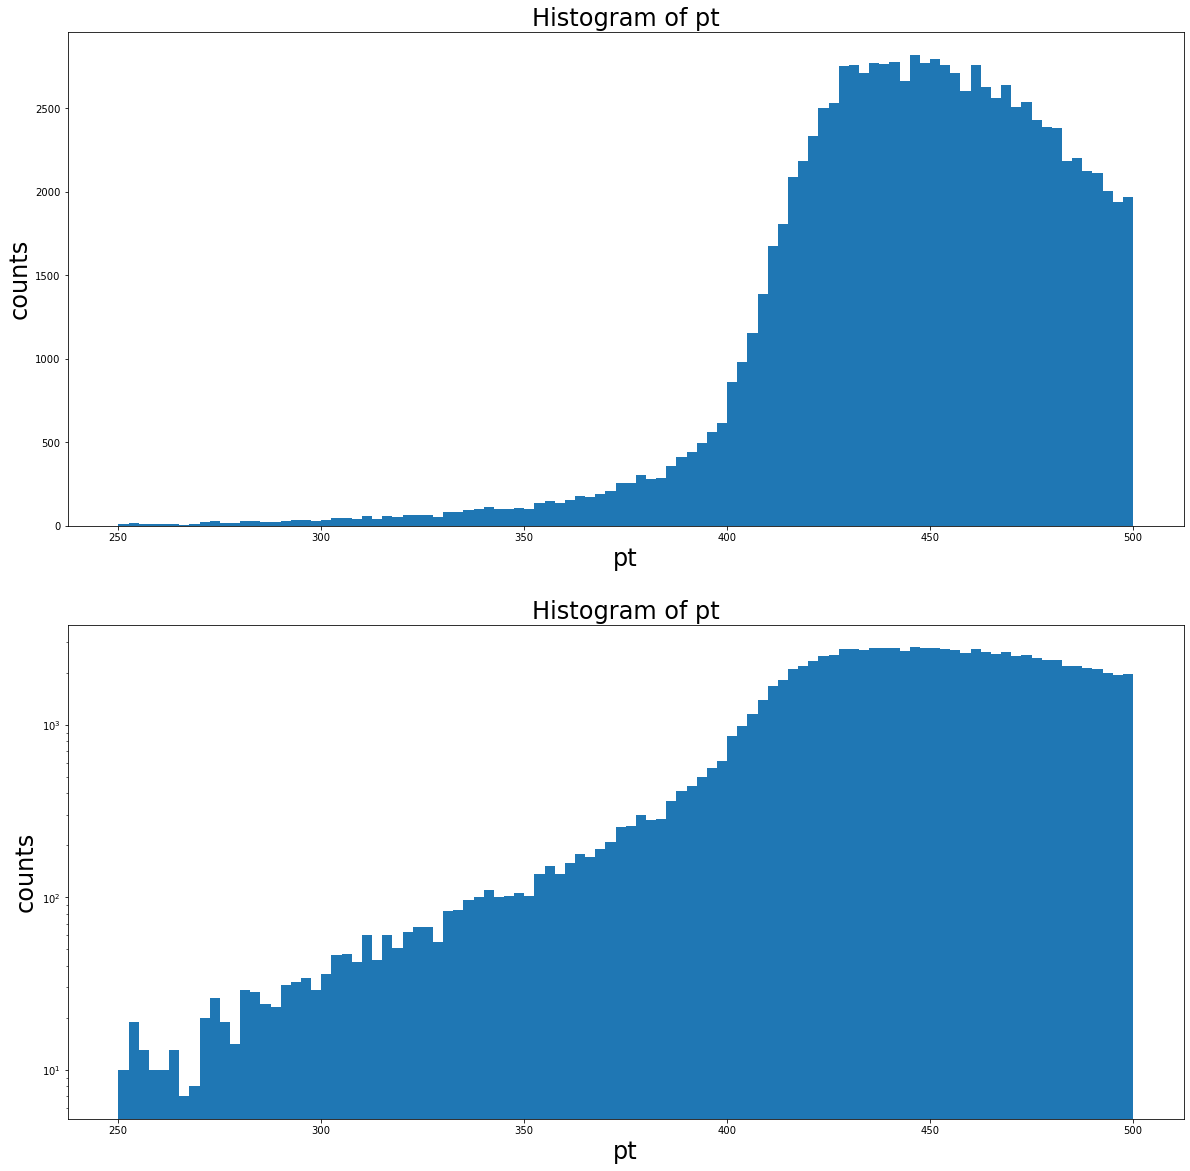

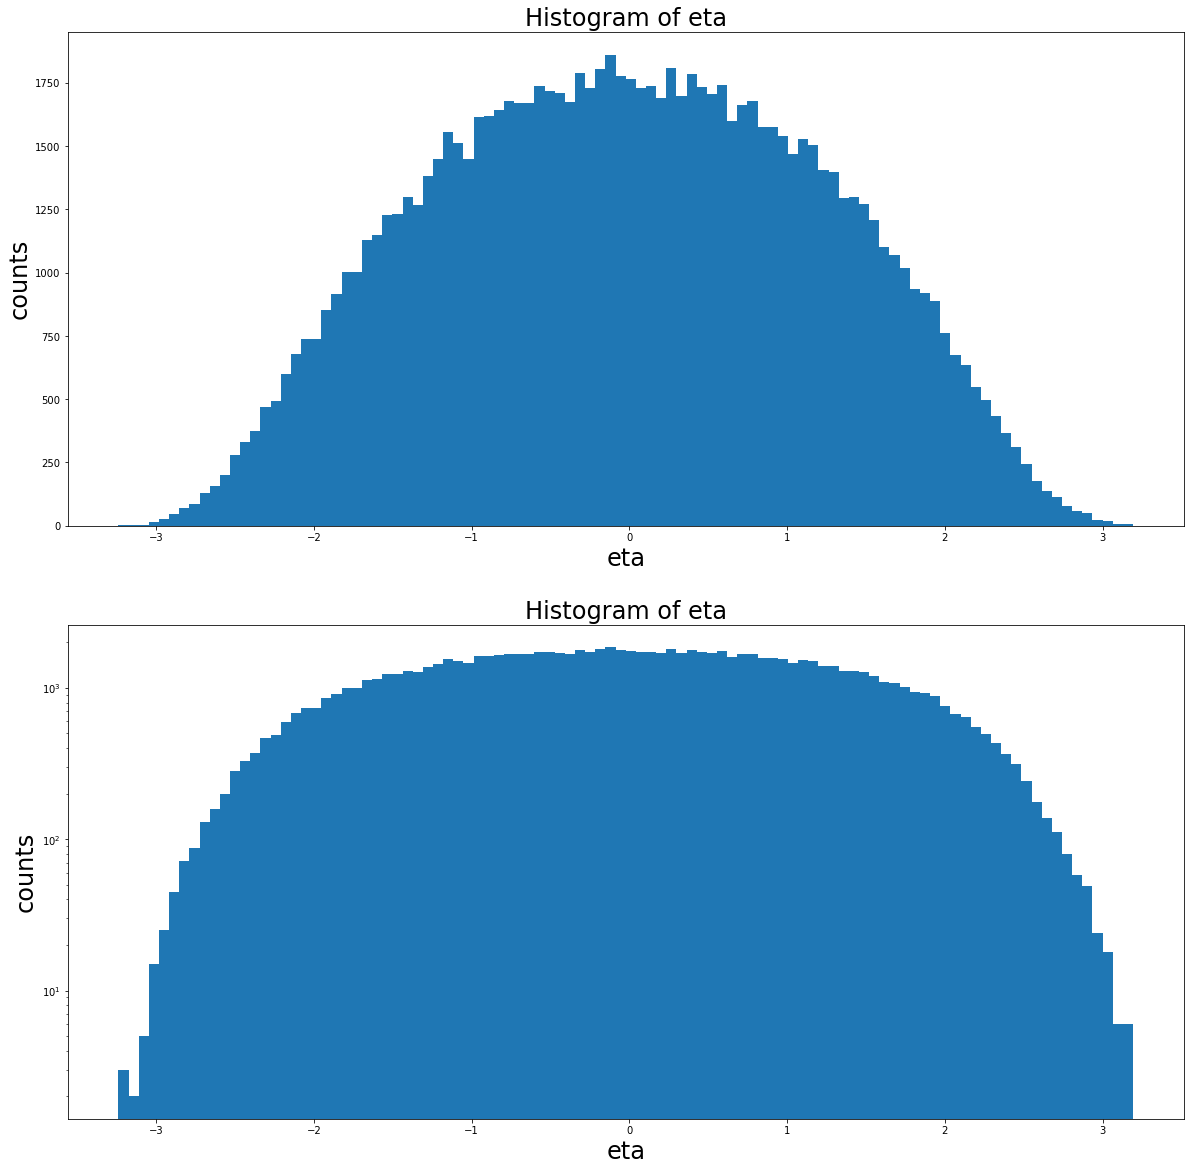

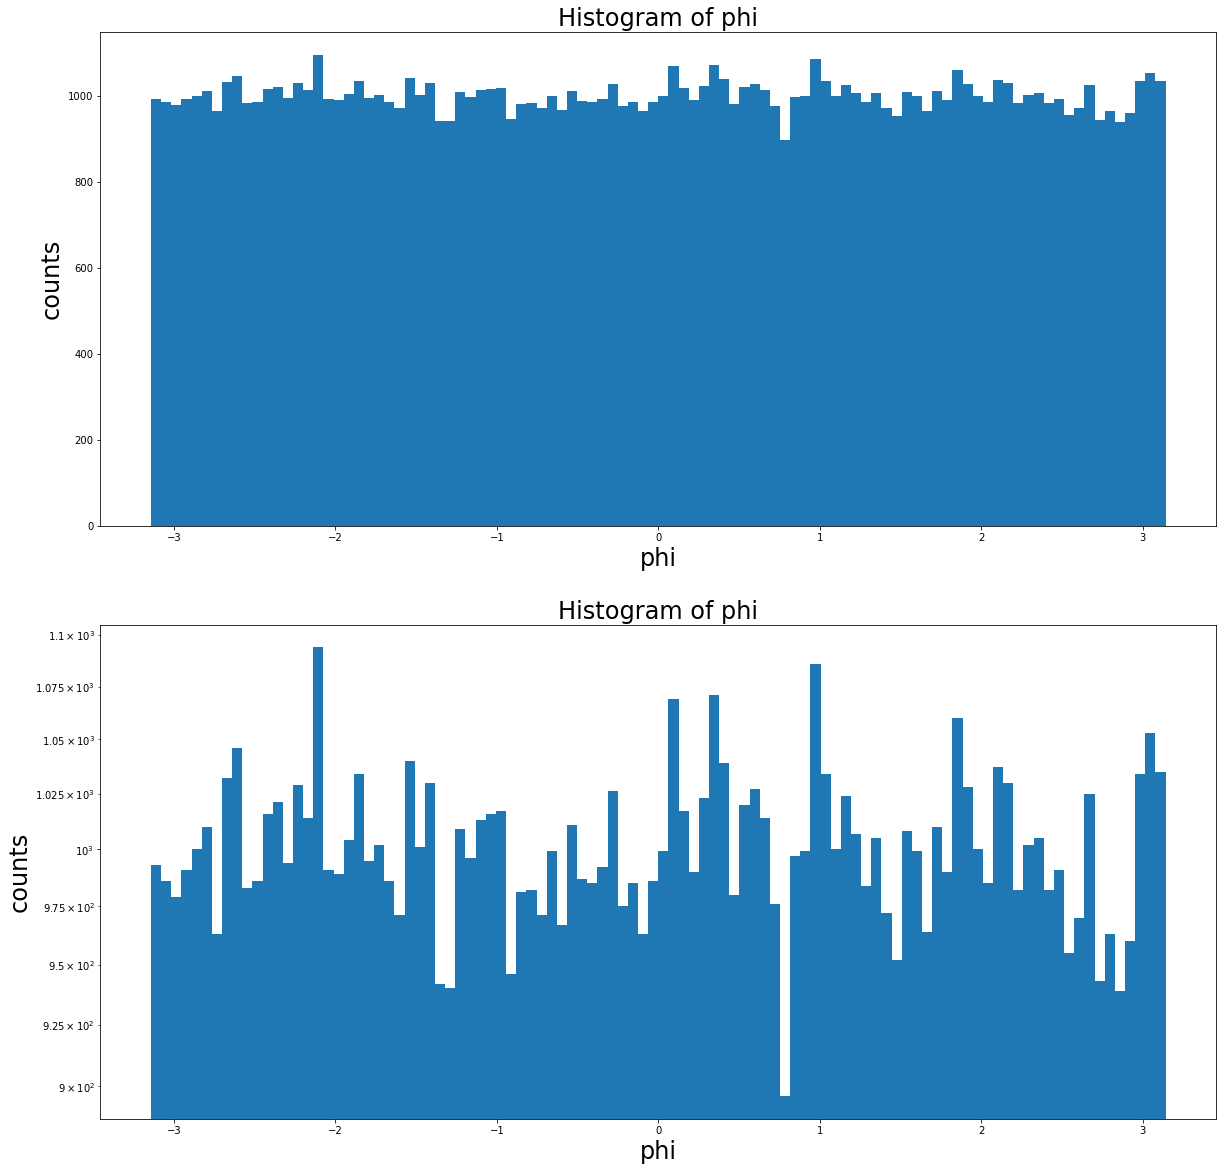

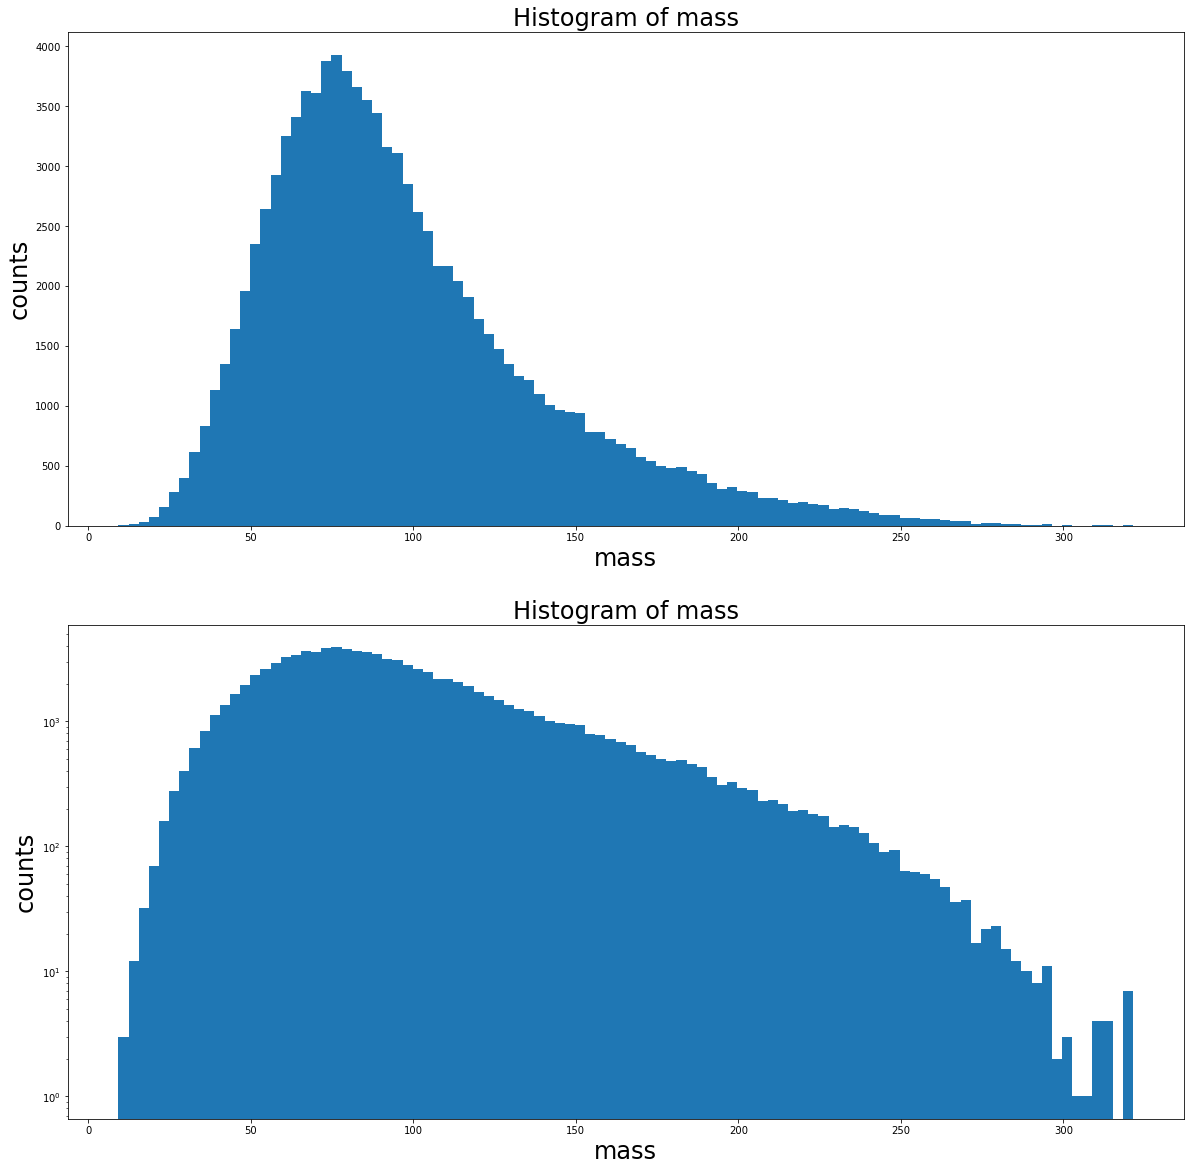

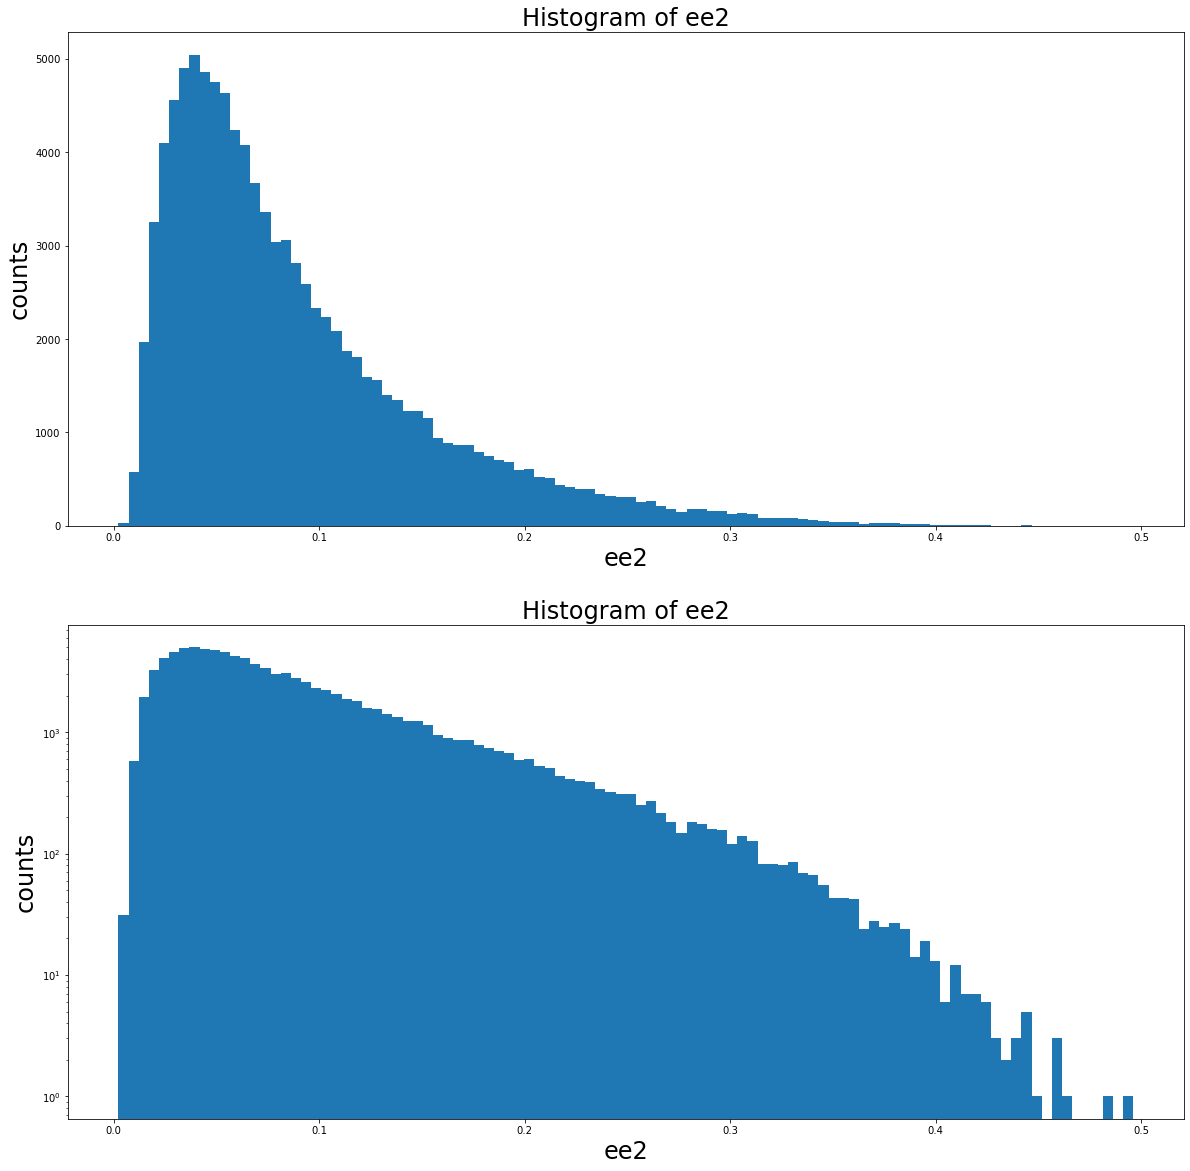

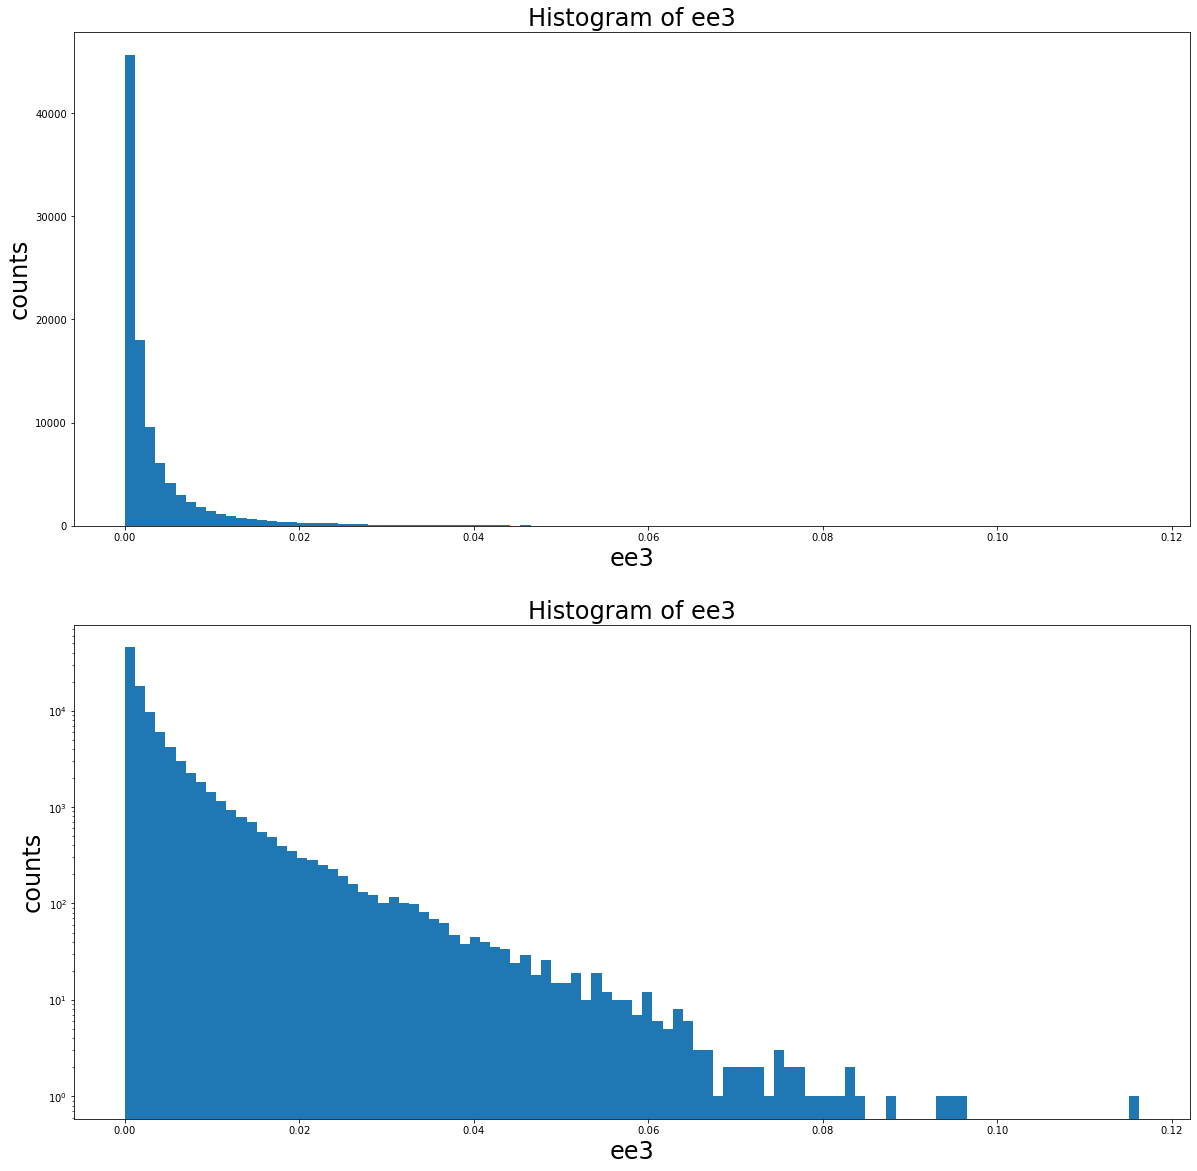

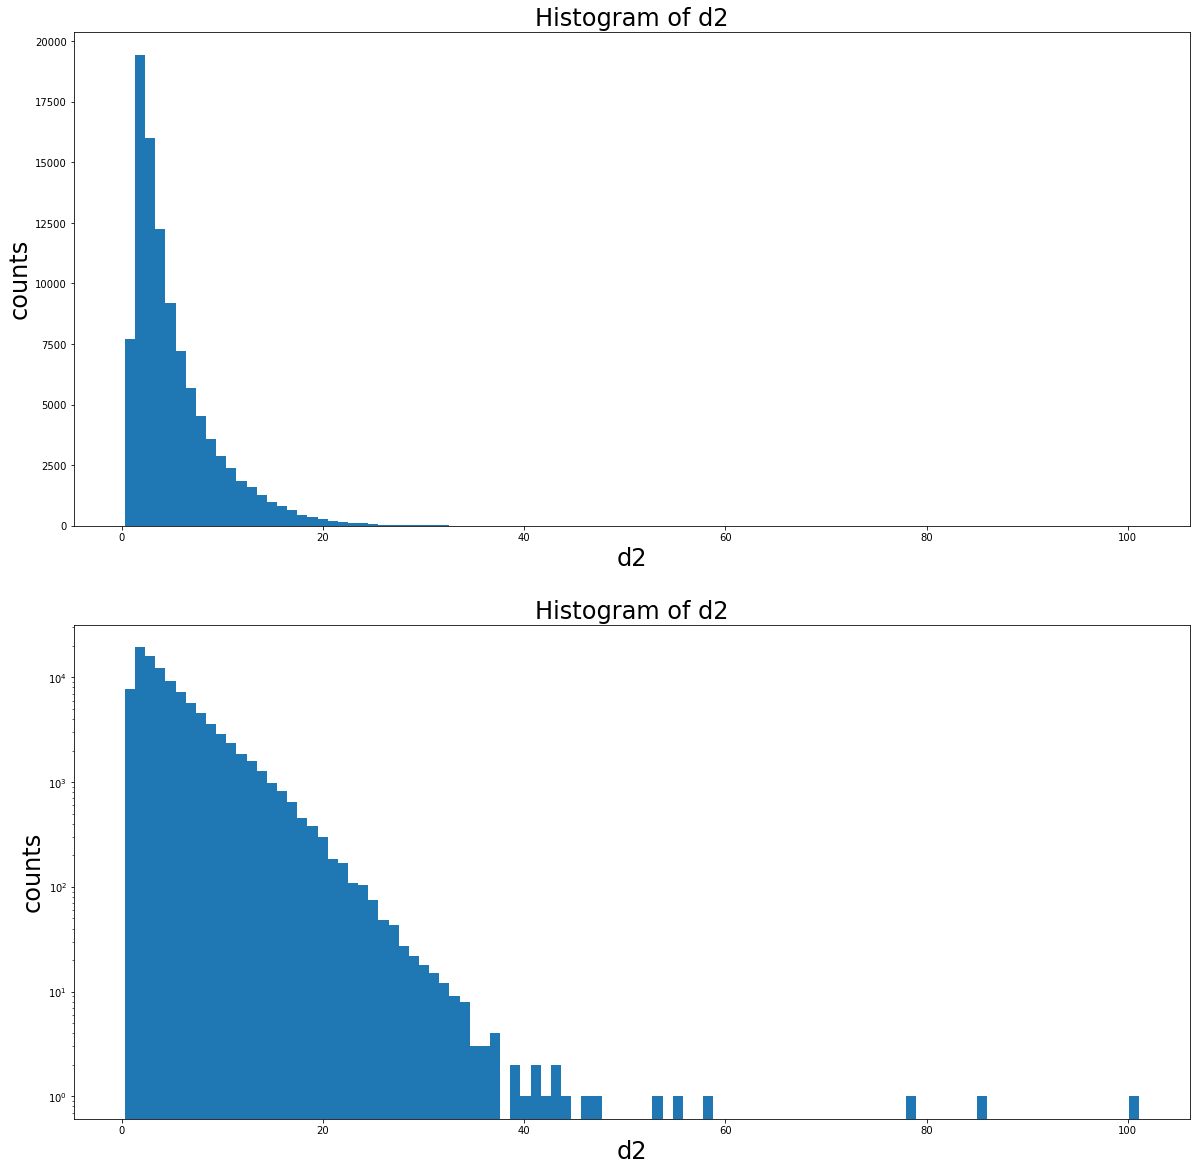

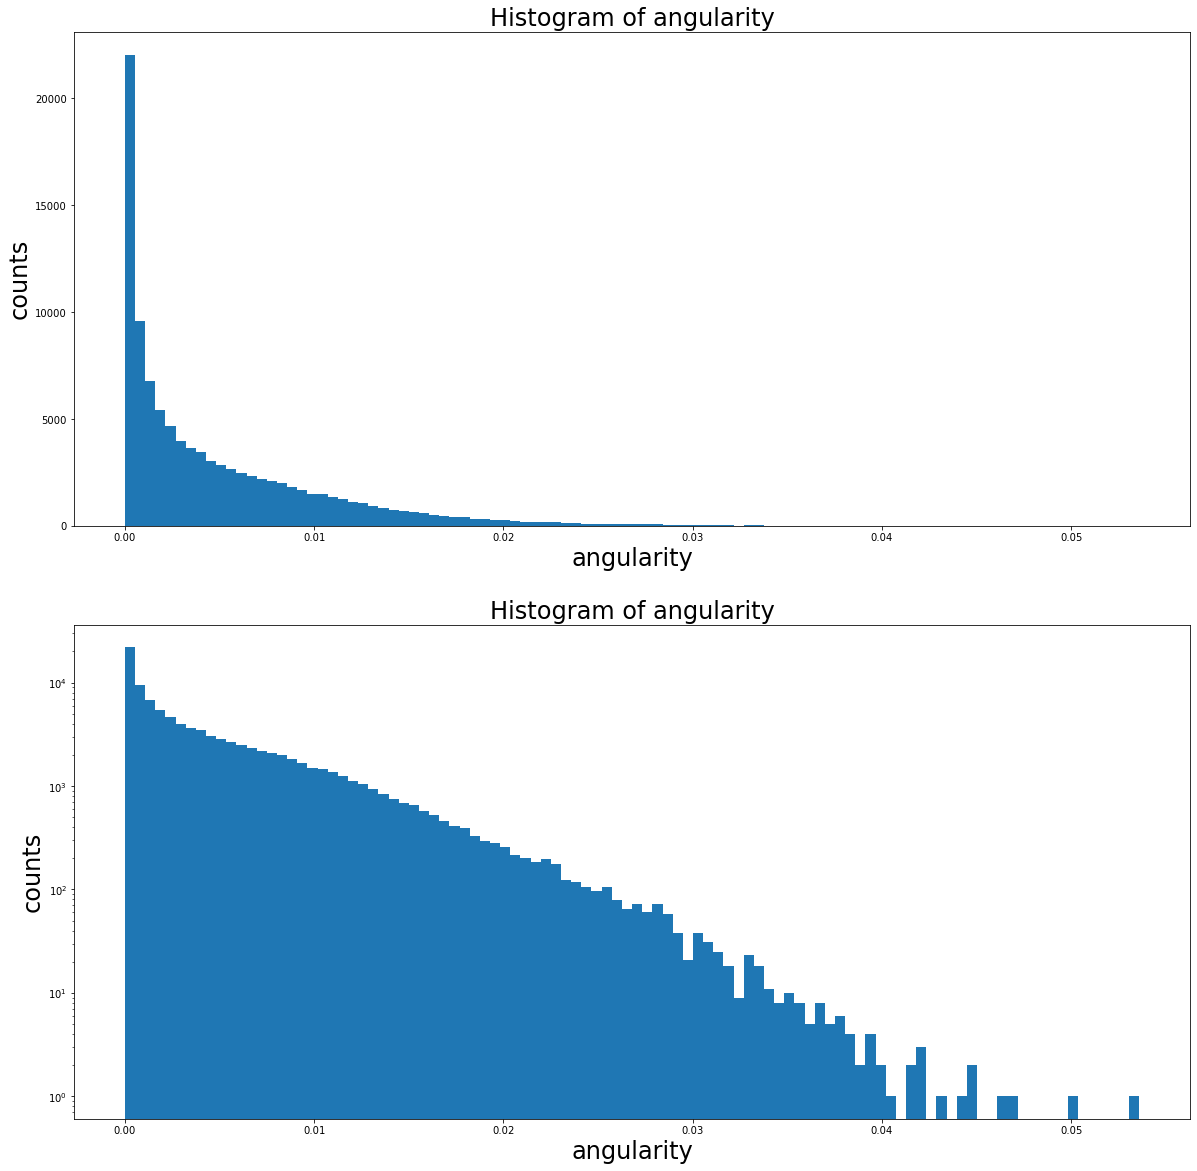

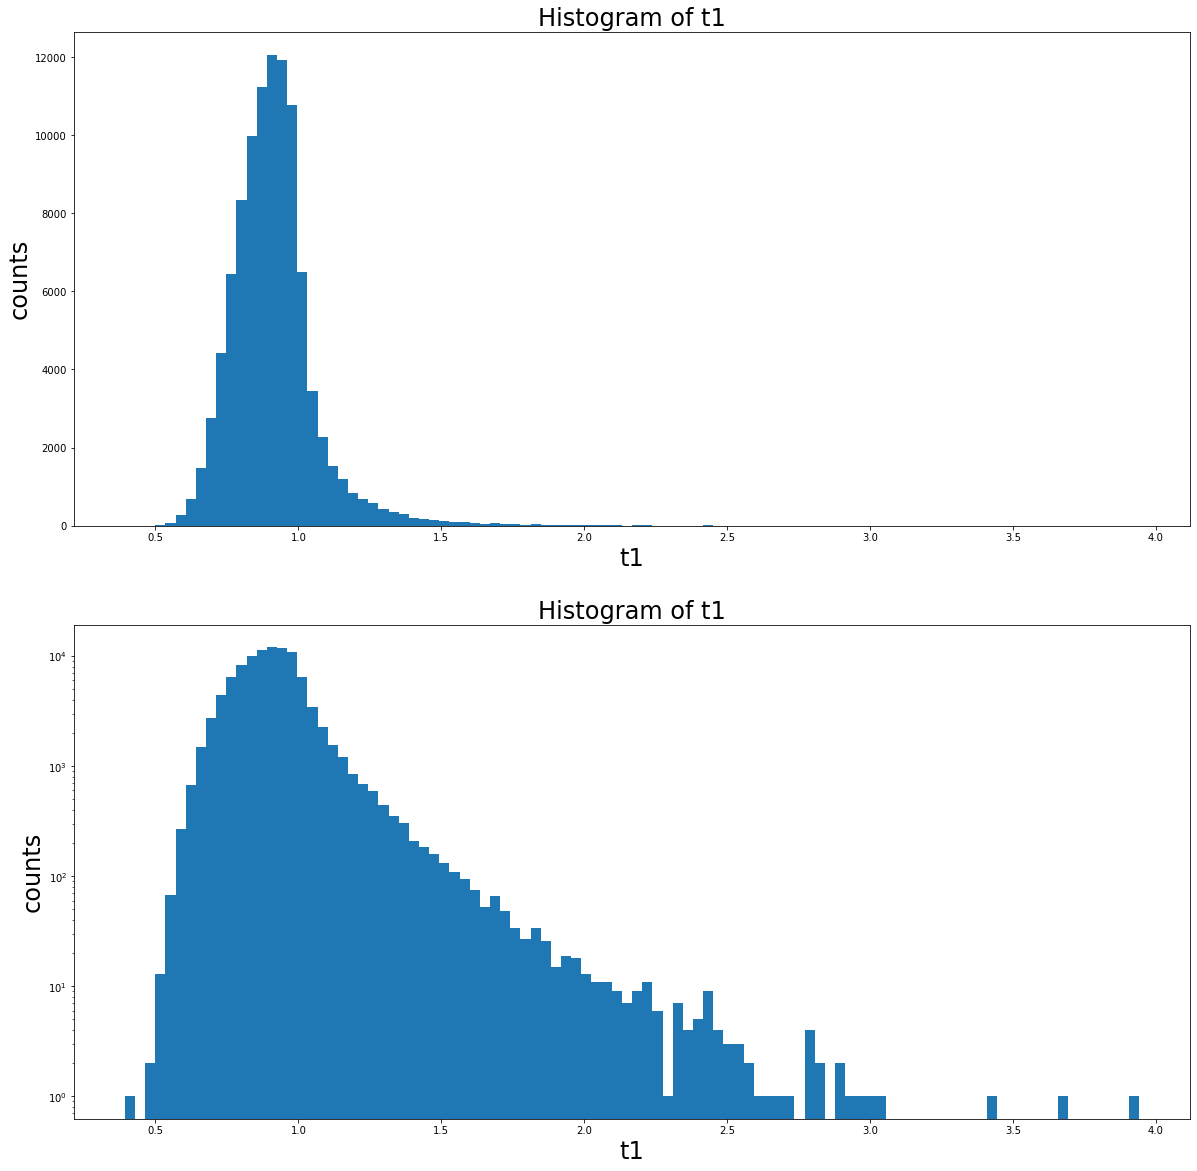

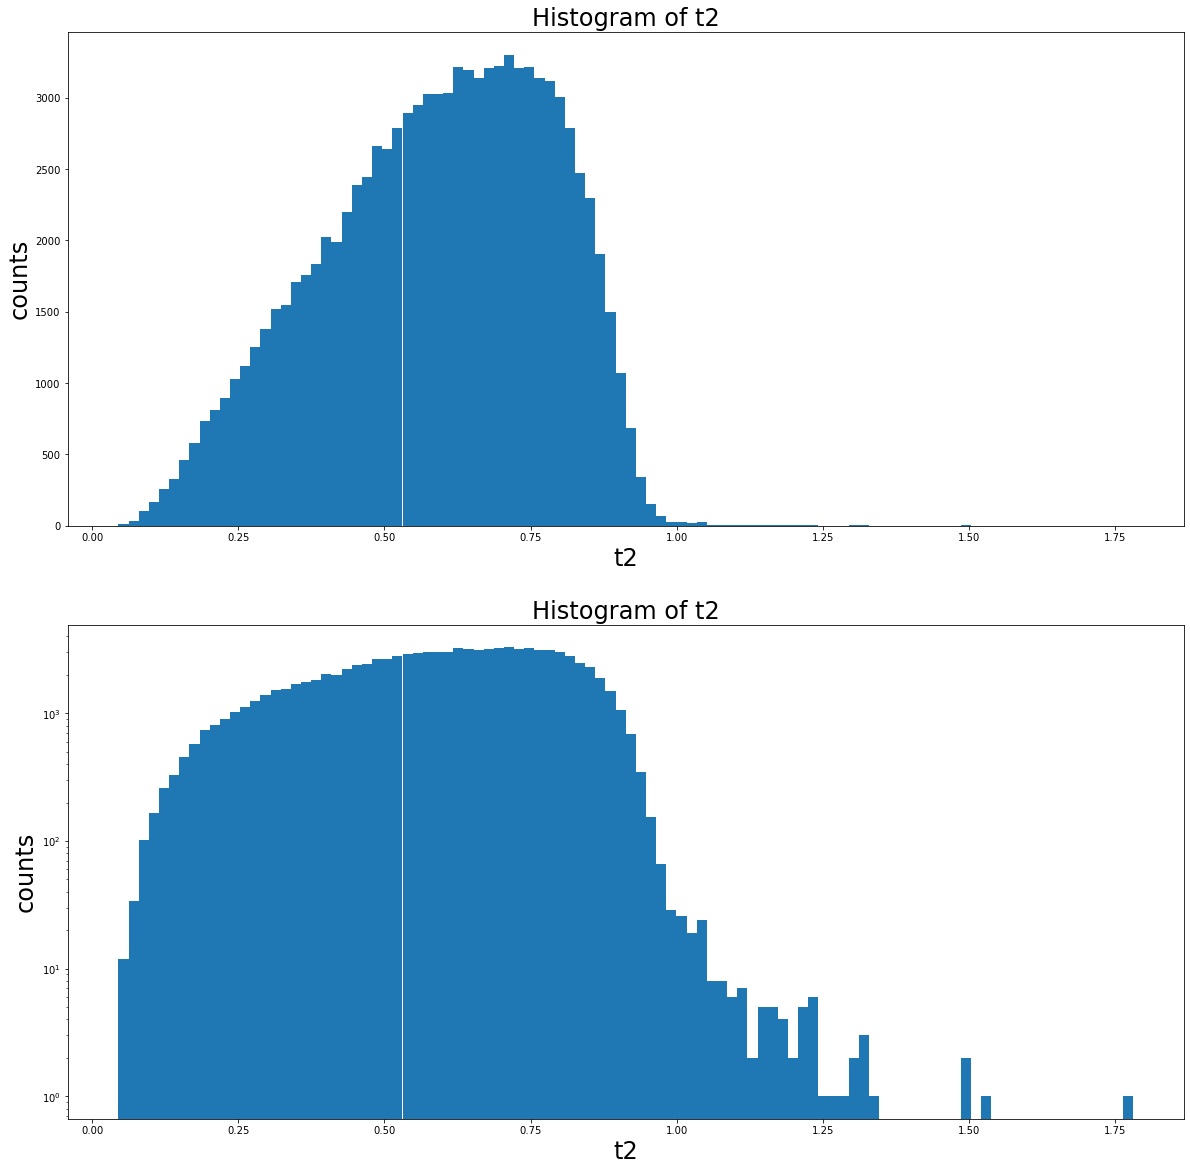

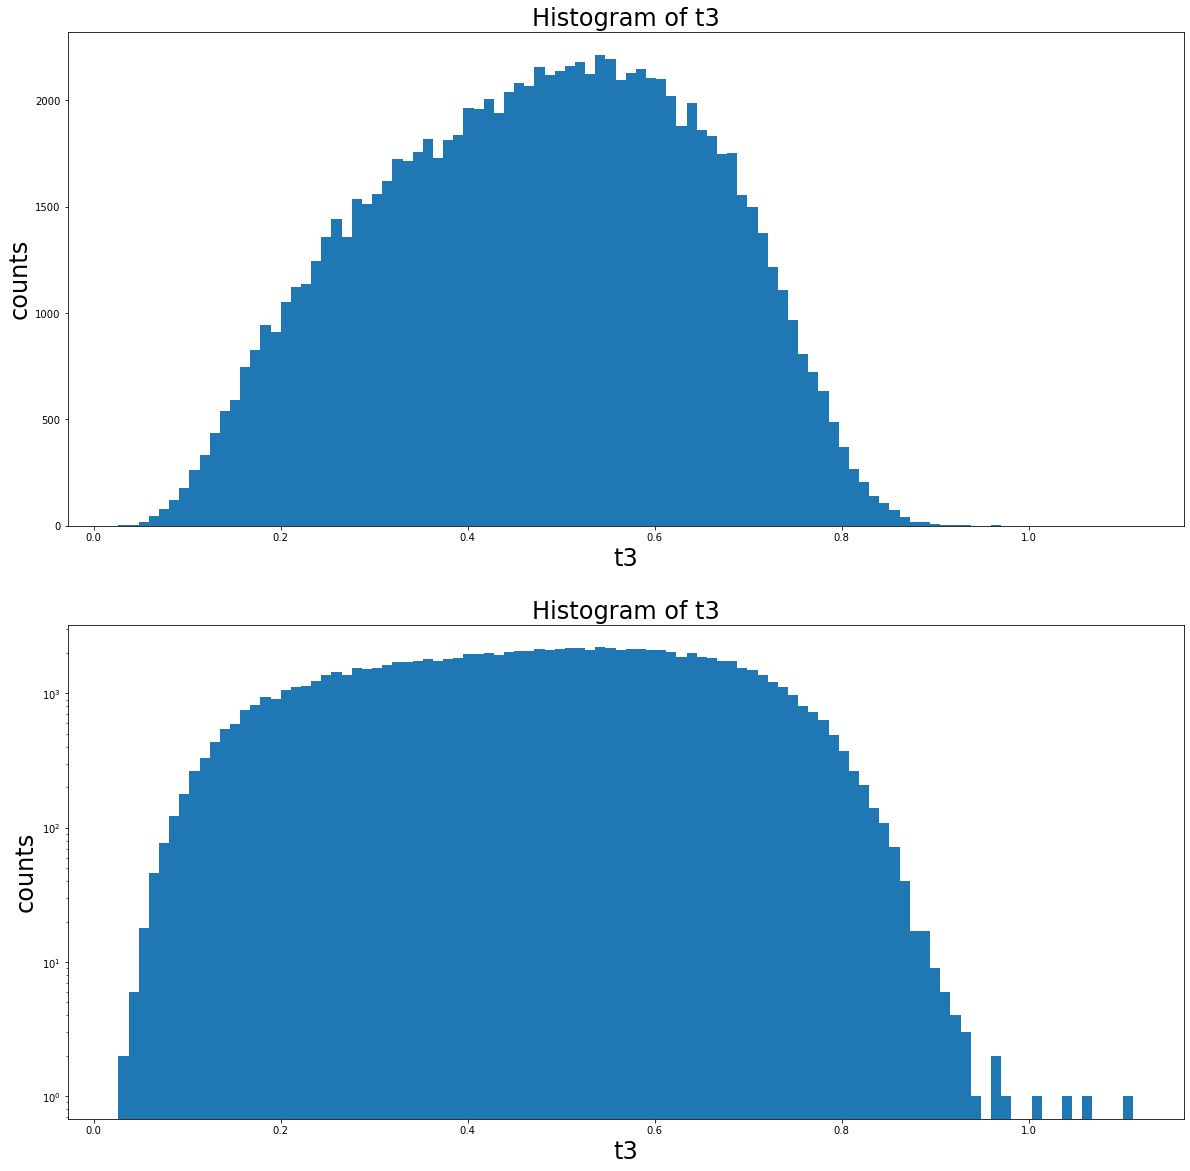

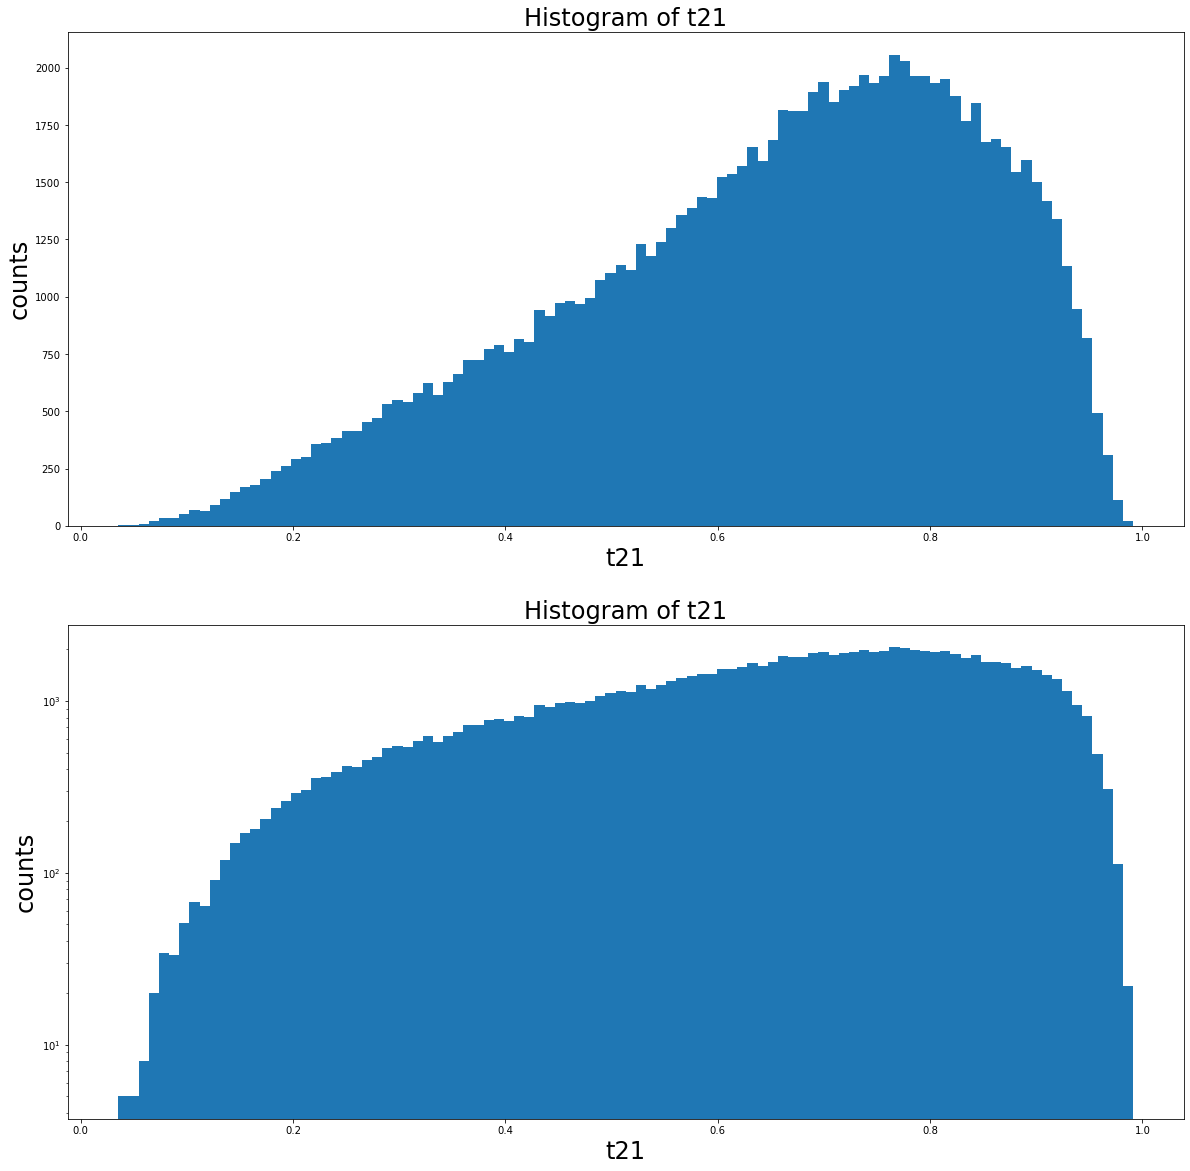

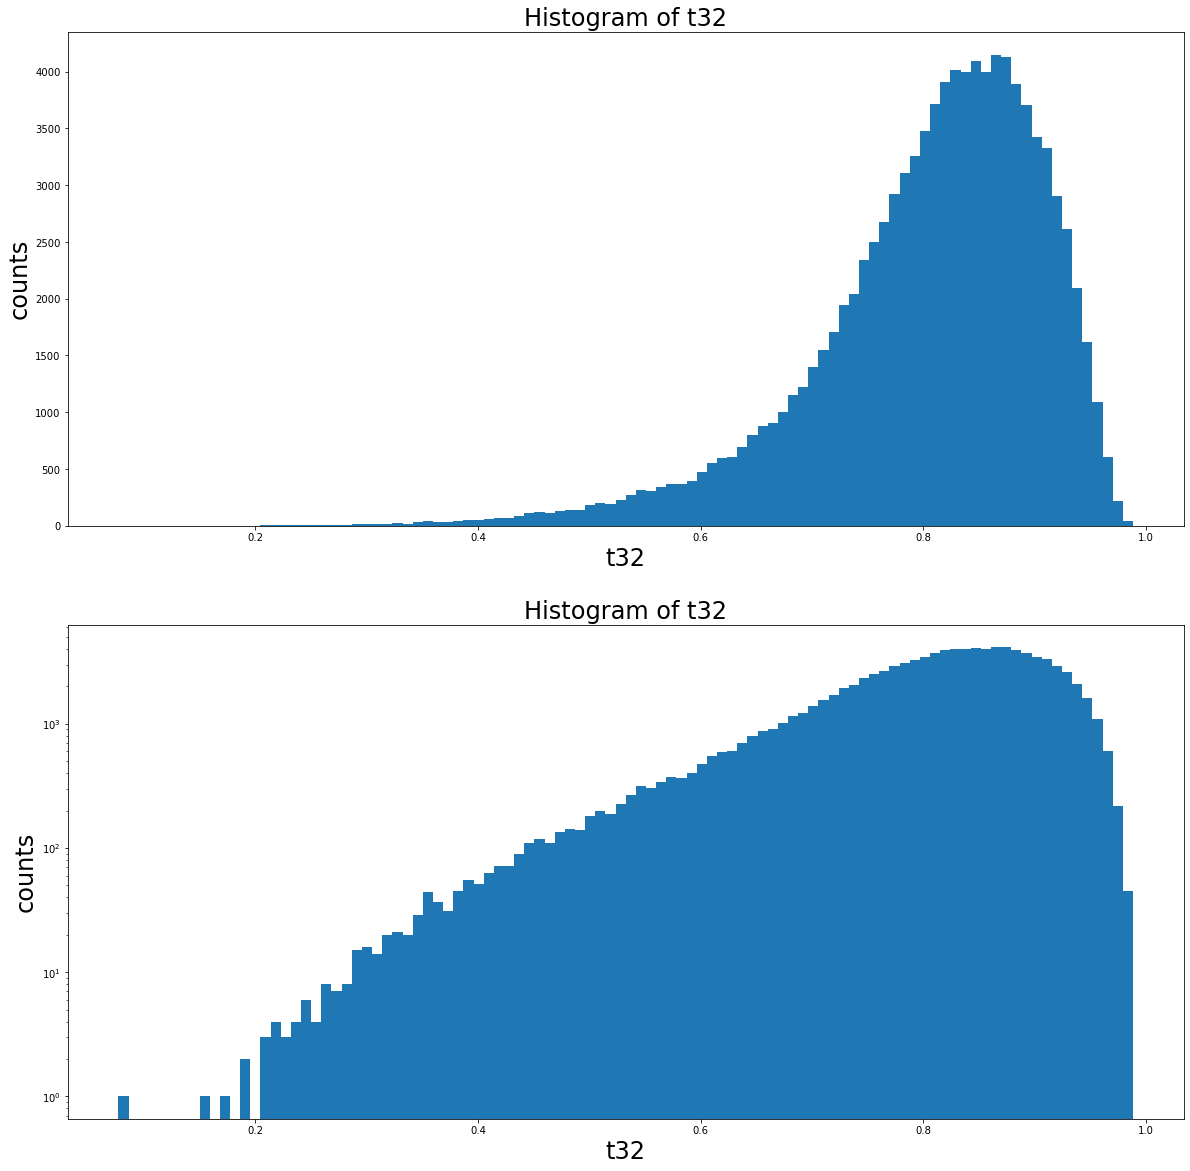

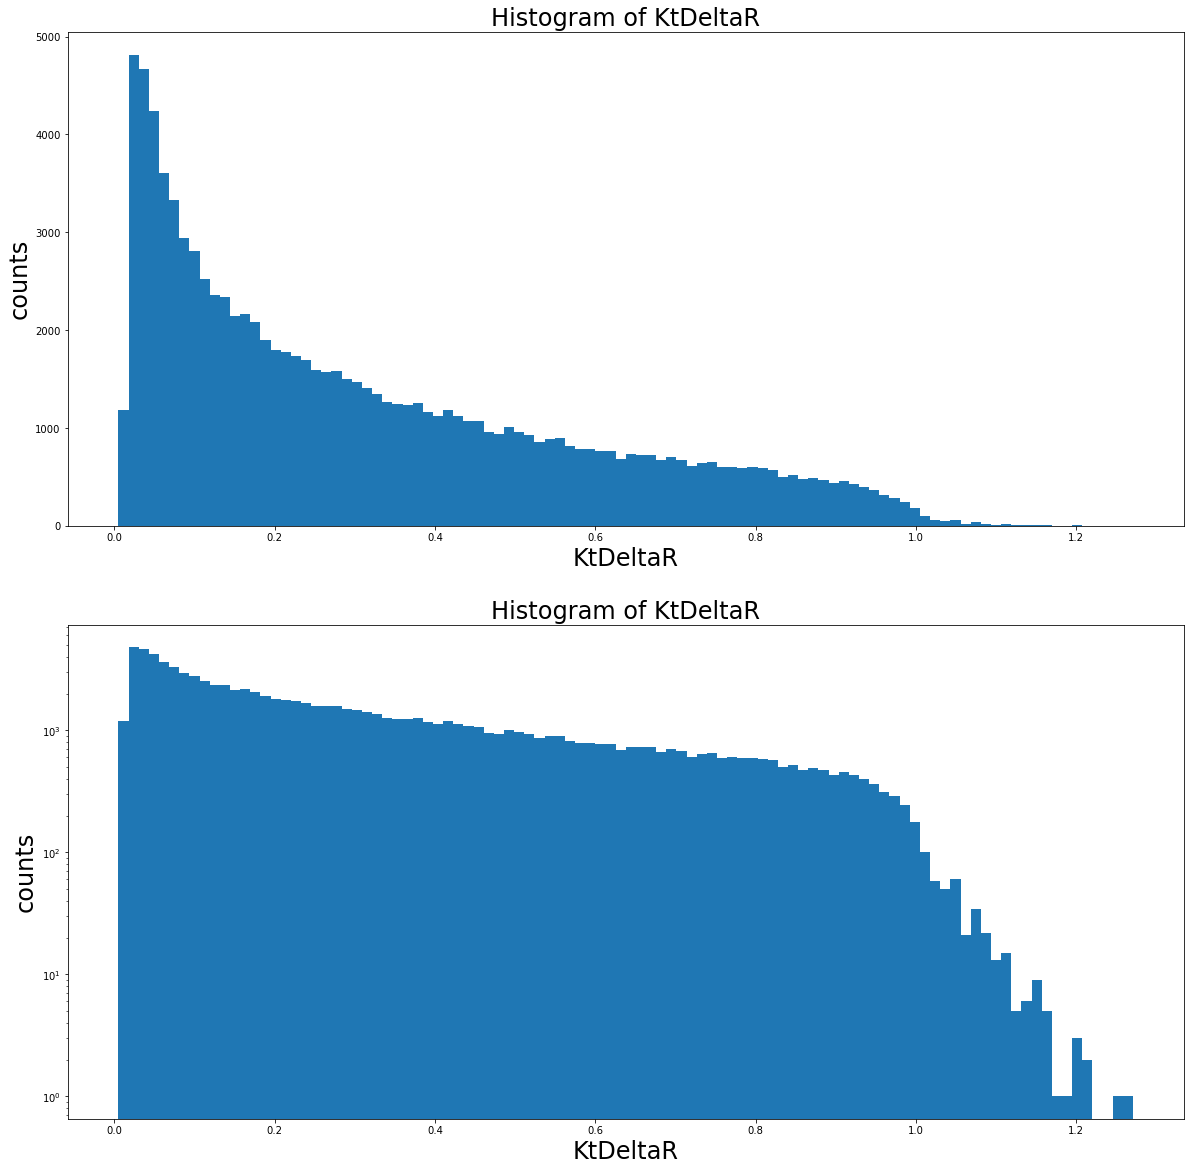

In [39]:
for i in new_dict.keys():
    makeHists(new_dict[i][:], i, 100)

Some of these have pretty weird shapes. I'm not really sure what else to do for this part as it is a little non descriptive. "Get familiar with the data making sure you understand the axis, etc."

### TASI Lectures on particle physics: 

#### Kinematics
- Eta: Is a geometric quantity that depends on theta, eta goes from - infinity to infinity as theta goes from 0 to pi.

- We're most interested in events where most of the momentum ends up transverse to the beam i.e. in the x and y axis

- if $(p_1+p_2)^2 = m^{2}_Z$ then Z is produced at rest in the partoniuc center of mass frame

- Like to work with variables that have the same values in the partonic and center of mass frame: longitudinally boost invarient. 

- $p_x$ and $p_y$ called the transverse momenta and longitudinally boost invariant.
- the azimuthal angle $ \phi = \tan^{-1}\frac{p_x}{p_y}$ is also boost invariant

- *Plotting distributions as functions of rapidity rather than polar angle makes it easier to disentangle the physics of the protons that produced the boost from the physics of the hard collision that we are studying*'
    - Rapidity is a kinematic quantity that is defined as $y = \frac{1}{2}\ln\frac{E+p_z}{E-p_z}$. Rapidity is not boost invariant, but differences in rapidity *are* boost invariant. Psuedorapidity $\eta = \ln \cot\frac{\theta}{2}$ is a *geometric quantity* and is equal to rapidity only for massless particles.
    
#### Observables
- All observables are functions of the momenta and energy.  
- Often interested in invariant mass. For $pp \rightarrow \gamma\gamma $ we may look at the invariant mass of two photons. Plotting the number of events observed as a function of the invariant mass should show a resonant peak at the mass of the Higgs Boson. 
- The invariant mass of two particles is $m^2 = \sqrt{(E_1+E_2)^2 - (p_1 + p_2)^2} $ But we don't always know all the components of momentum. The best we can do is considetr the transverse mass where $E_T = \sqrt{m^2 + p^2T}$
$$ m_T = \sqrt{(E^1_T + E^2_T)^2 - (p^1_T+ p^2_T)^2} $$

#### Jets
- Angular and pT distributions of jets provides evidence of SM and BSM physics'


#### SM Stuff
- Three higgs discovery modes: 
    - The golden channel $h \rightarrow ZZ^* \rightarrow 4l $ In this channel $ S/B $ is large and one can fully reconstruct the Higgs allowing spin to be measured
    - The $ h \rightarrow \gamma\gamma $ small $S/B$ but the higgs could be fully reconstructed producing a visible bump in $m_{\gamma\gamma} $
    - Finally $h \rightarrow W W^* \rightarrow 2l2\nu\nu $ But one could not see the higgs as a bump. Instead there is a broad excess, so Higgs can only be seen if the backgrounds are known. 
    


# Identification of boosted Higgs bosons decaying into b-quark pairs with the ATLAS detector at 13 TeV

- Decay of Higgs bosons into a $b\overline{b}$ pair is the largest branching fraction in SM and thus is a major decoy mode to use when searching for resonances involving high-momentum Higgs bosons

- The signature of a boosted Higgs boson decaying into a $b\overline{b}$ pair is a collimated clow of particles having energy and angular distribution of the jet constituents consistent witha  atwo body decay containing two b-hadrons

- the Higgs bosonm tagging efficiency and background rejection for the two most common background processes the multijet and hadronioc top-quark backgrounds are evaluated using monte carlo simulations. 

# Outline: 
1) *Do all of the variables provide discrimination between signal and background? " 
    - No, only the kinematic varaibles are relevant to distinguish signal from background. This is taken from Alex's guthub repository where the sample analysis are completed using pt, eta, phi, mass, ee2, ee3, and d2. 
        - What the hell are the differences between the variables
            - Some of them I know what they mean like pT, eta, phi, mass, but what are the other ones and what do the mean
            - Which ones provide discrimination between signal and background? 
                - analagous to how solar phase didnt have any affect on counts in earlier lab?

2) *Are there correlations among the features?*
    - Not exactly sure how to search for these besides simply reading more about the intrument.I suppose I could plot them as 2d histograms or something to try and see
        - For instance: Do events with greater angle theta have lower pT? Yes becasue these events have greater pz
    
3) *Compute the expected discovery sensitivity (Significance of the expected signal) by normalizing each sample appropriately*
    - It is given the number of higgs events per data set, so the sensitivity has to be equal to or greater the portion of higgs events to total events
    - roughly N higgs/Nevents. make this a percent, and figure out the sigma, a little unlcear about how to write this as significance. 
    
4) *Develop a plan to optimize the sensitivity*
    - Higgs events are marked by certain data charachteristics, so develop a method to sort the data to optimize for higgs event selection? 
    - Decide on ways to select the higgs decay events from the QCD background. Filter the background of non higgs decay, higgs decay events i.e. multiple things have a bb decay mode, only one of them is the higgs, how to filter the bb decays to get higgs significance. 

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lab 5
The data for the remainder of the course is simulated data of proton-proton collisions at the LHC. The data represents not raw data from detectors, but jets with corresponding kenematic and substructure variables. The data is further broken into two different sets: a signal set labeled "higgs" where the jets correspond to decays from Higgs and "qcd" which correspond to jets generated by the decay of particles that aren't higgs. Each set contains 100,000 jets all with pt within 250 and 500 GeV.

## Introduction to Jets
A jet is a narrow cone of hadrons and other particles produced by the hadronization of a quark or a gluon. When an object containing color charges fragments, the fragments create color charges around them that all move in the same direction. The collisions at particle accelerators are likely to contain many of these jets which are uninteresiting as a result of the many many collissions that happen every second, however, somewhat infrequently the interactions of the constituent color charges of the proton-proton collision produces physics which we are interested in. These interesting events also result in jets, therefore it is paramount to be able to distinguish the interesting jets from the background jets in order to study particle physics.


## The Data

In [19]:
open_qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
qcd_data = pickle.load(open_qcd)
open_qcd.close()

open_higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
higgs_data = pickle.load(open_higgs)
open_higgs.close()

print(higgs_data.columns, qcd_data.columns)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object') Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


As described above the data is broken into two categories: kinematic variable and jet substructure variables. The kinematic variables are those that describe the overall characteristics of the jet: pT, mass, eta and phi. The substructure variables decribe characteristics of the jets and generated as a function of the kinematic variables or of the kinematic variables that describe the constituent particles of an individual jet. 

#### **Kinematic variables**
The first two variables necessary for decribing a jet give it's location on a sphere surrounding the the collision vertex. The first coordinate variable is $\phi$ and gives the azimuthal angle around the beamline from $-\pi$ to $\pi$. The sencond is $\eta$ which is given by  
$$ \eta = - \ln \cot\frac{\theta}{2}$$

where $\theta$ is the angle off of the beamline. This means that for $\theta = 90$, $\eta = 0$. Large values of $\eta$ correspond to points furhter up or down the beamline. 

In [68]:
data = [higgs_data, qcd_data]
titles = ['Higgs Data','QCD Data']

def makeHists(name, bins):
    """
    Create a histogram and a semiLog histogram for some imput data that looks like
    the plots above
    
    bins: the number of bins
    
    Name: a string, the name of the column to be histogrammed
    """
    fig, ax = plt.subplots(1,2, figsize = (20,10))
    
    for i in range(2):
        ax[i].hist(data[i][name], bins)
        ax[i].set_title(titles[i], fontsize = 24)
        ax[i].set_xlabel(f'{name}', fontsize = 24)
        ax[i].set_ylabel('counts', fontsize = 24)
        ax[i].set_yscale('log')

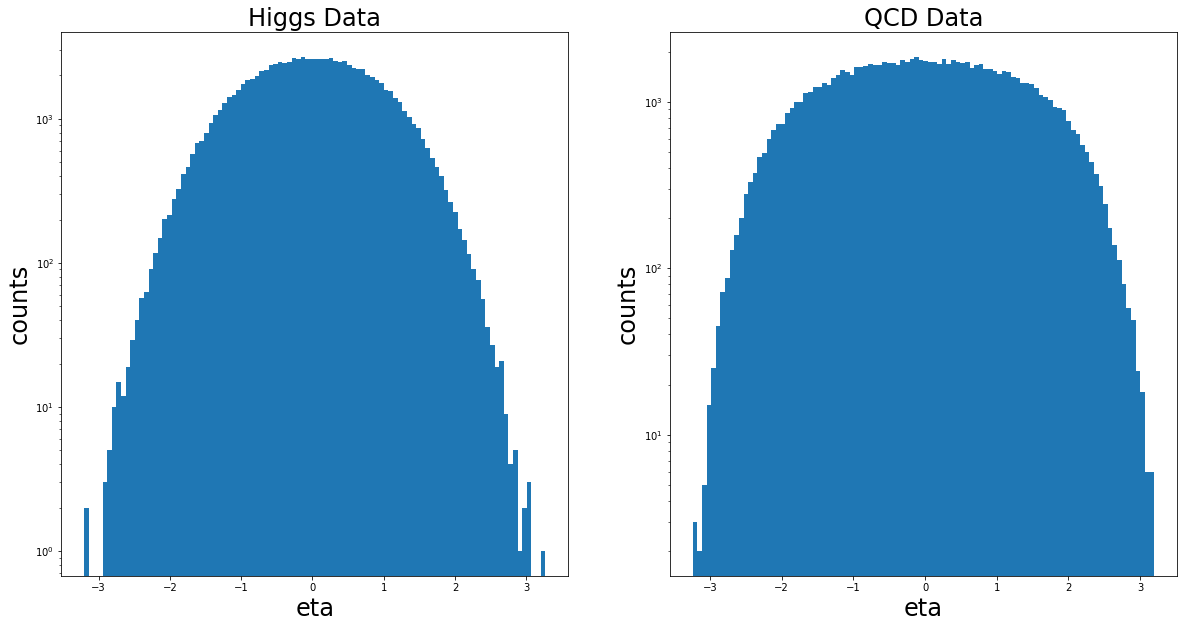

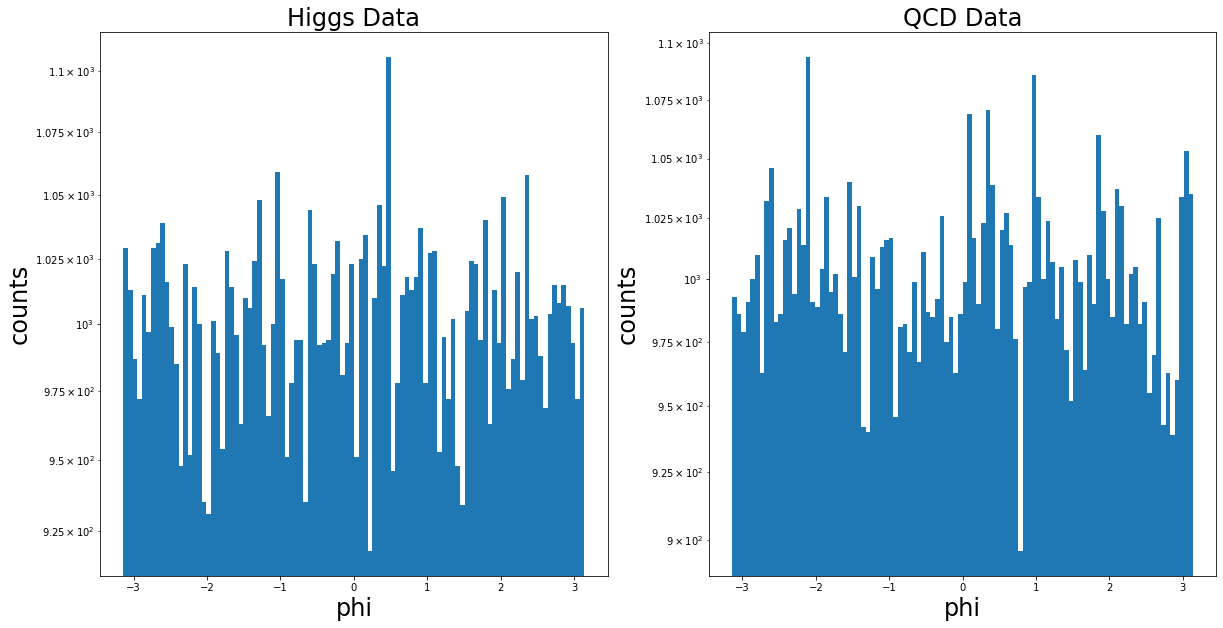

In [69]:

makeHists('eta', 100)
makeHists('phi', 100)

 **Mass and transverse momentum**

Mass and transverse momentum are measured for each jet using the path an indivudual particle takes through the detector and the energy it deposits onto various calorimeters. For a jet, the mass and transverse momentum are the sum of the constituent particles. This quantity is used as the same variables for the hadrons that created the jet initially. For the data set we are working on, pT is constrained between 250 and 500 GeV.

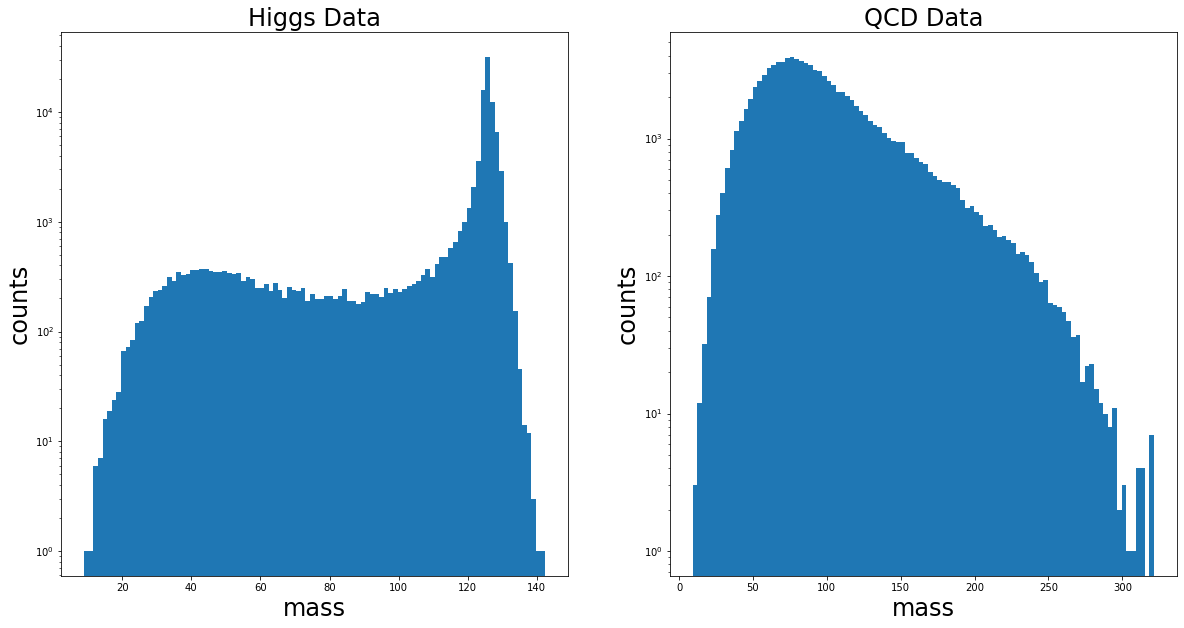

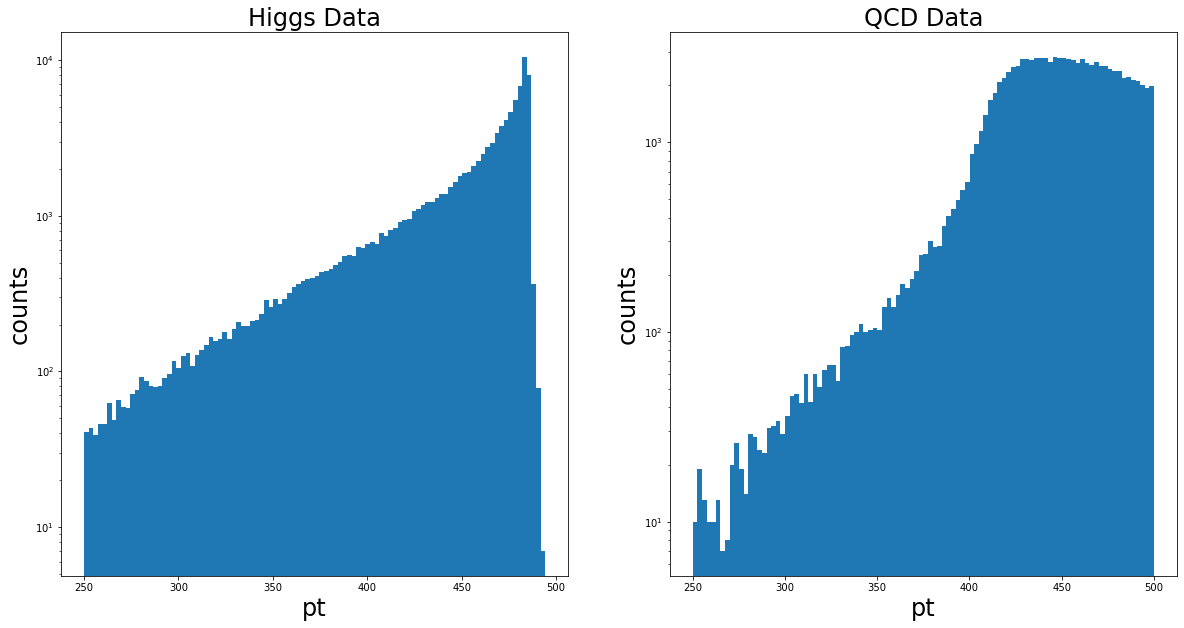

In [70]:
makeHists('mass', 100)
makeHists('pt', 100)

#### **Substructure variables:**

As stated above the substructure variables are characteristics of individual jets. They can further be categorized into variables that describe the shape of the jet: energy correlation ratios and angularity and subjettiness: n-subjettiness and $k_t\Delta R$. 

**Jet shape variables**
The energy correlation ratios $E_{CFN}(\beta)$ where $N$ is some integer are given by
$$ E_{CFN}(\beta) = \sum_{i < j \in J}p_{Ti}p_{Tj}(\Delta R_{ij})^{\beta}
$$

for a jet J with constituents i. The 2 point correlation function is for when there are 2 constituent subjets of some jet J. $\beta$ is to give weight to the angular separation of ht ejete constituents. In the simulated data these functions are provided as  
$$ 
e_2 = \frac{E_{CF2}}{E_{CF1}}  
$$
and
$$e_3 = \frac{E_{CF3}}{E_{CF1}}$$

which correspond to `ee2` and `ee3`. Finally the quantity $D_2$ which is given by 
$$ D_2 = \frac{e_3}{(e_2)^3}
$$
is particularly useful in identifying two-body structure within jets and is represented in the dataset by `d2`. 

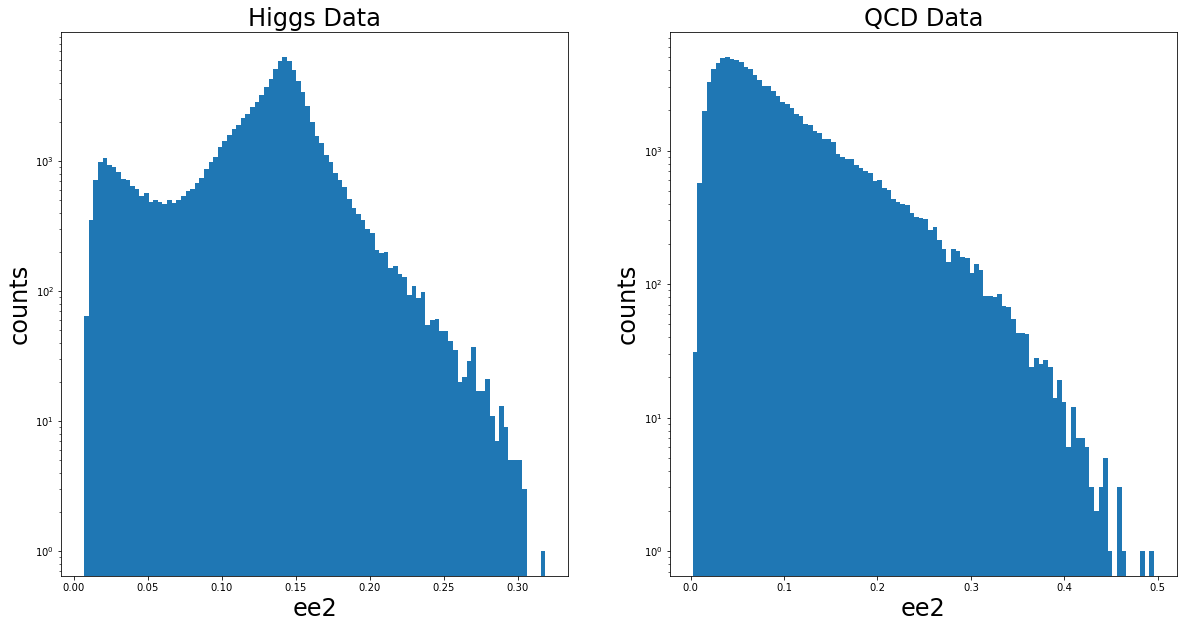

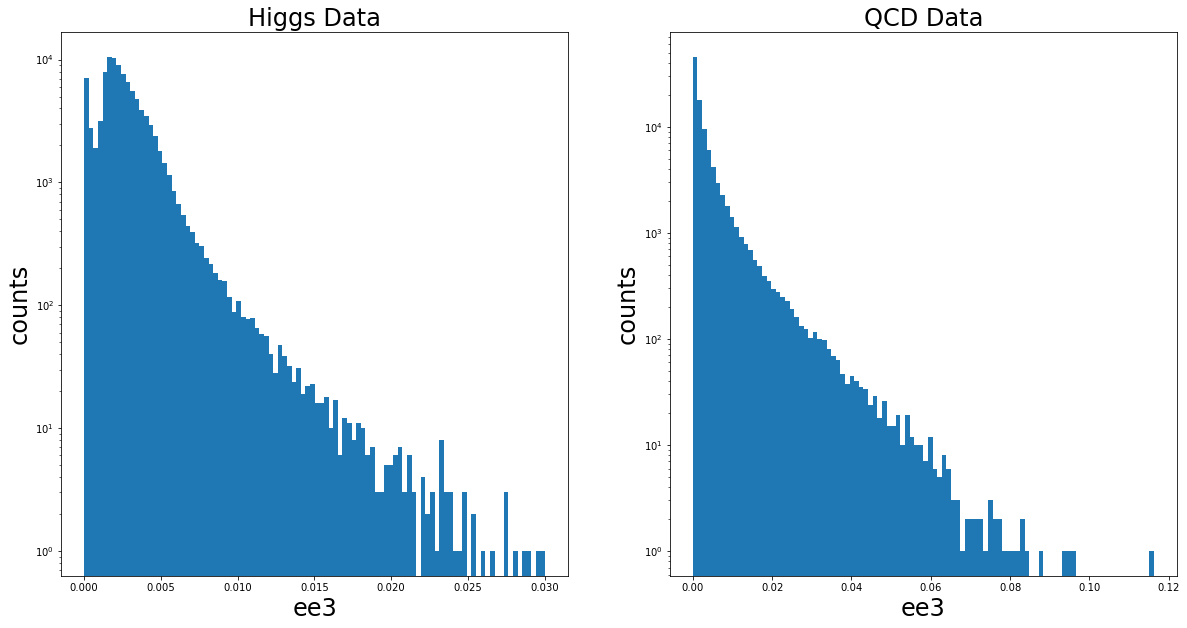

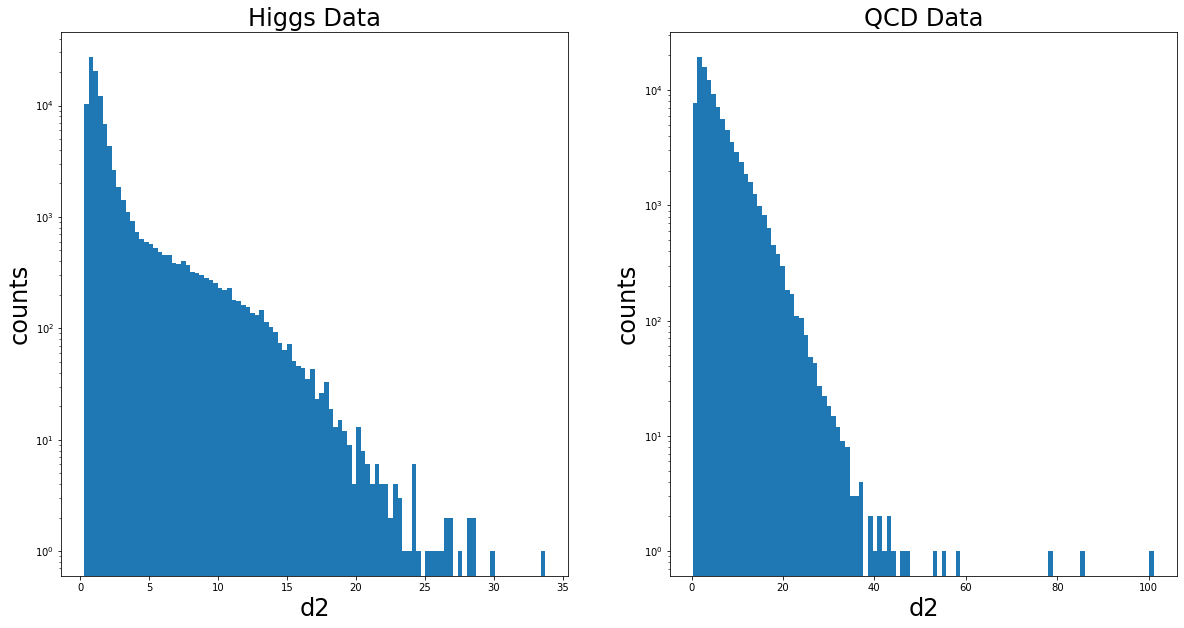

In [71]:
makeHists('ee2', 100)
makeHists('ee3', 100)
makeHists('d2', 100)

**Angularity, Subjettiness and $k_t\Delta R$**

The final seven variables all have to do with the something called *subjettiness*. Subjettiness refers the amount that an individual jet can be classified as constituent jets. Subjettiness is defined as
$$
\tau_N = \frac{1}{\tau_0}\sum_i\in J p_{Ti} \min(\Delta R_1 ... R_N)
$$

where N can take on value and the quantity $R_N$ is the distance between the $i^{th}$ constituent and the subaxes N of the jet. The ratios $\tau_{21} = \frac{\tau_2}{\tau_1}$ and $\tau_{32} = \frac{\tau_3}{\tau_2}$ have been shown to be particularly useful in identifying two-body structures in jets

[source](https://arxiv.org/pdf/1510.05821.pdf)

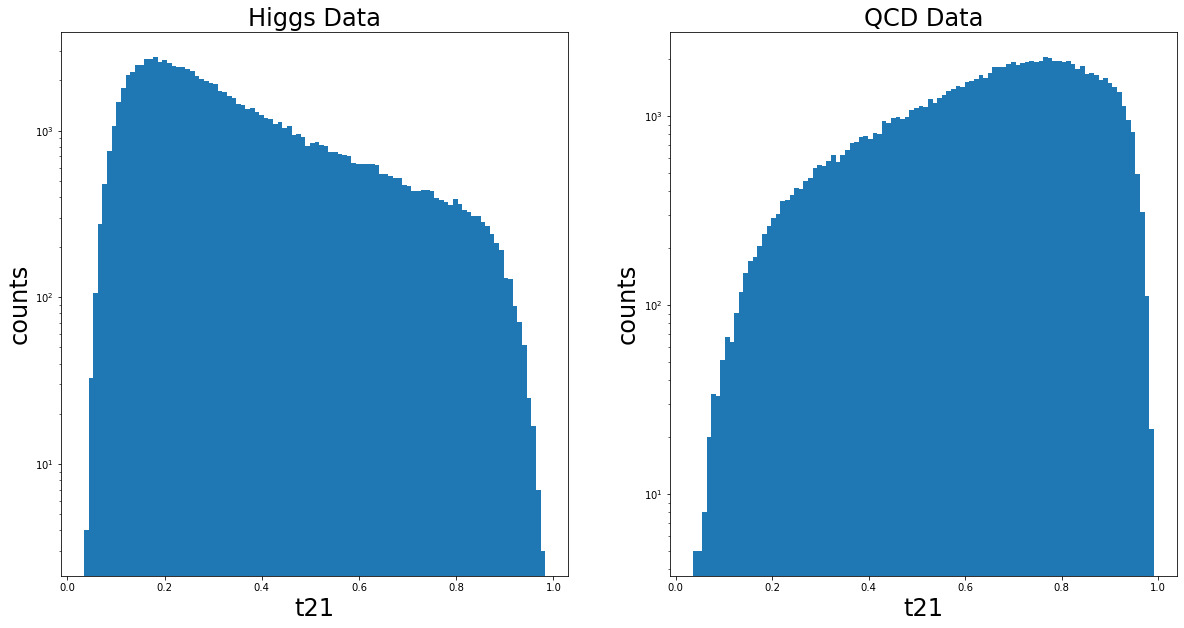

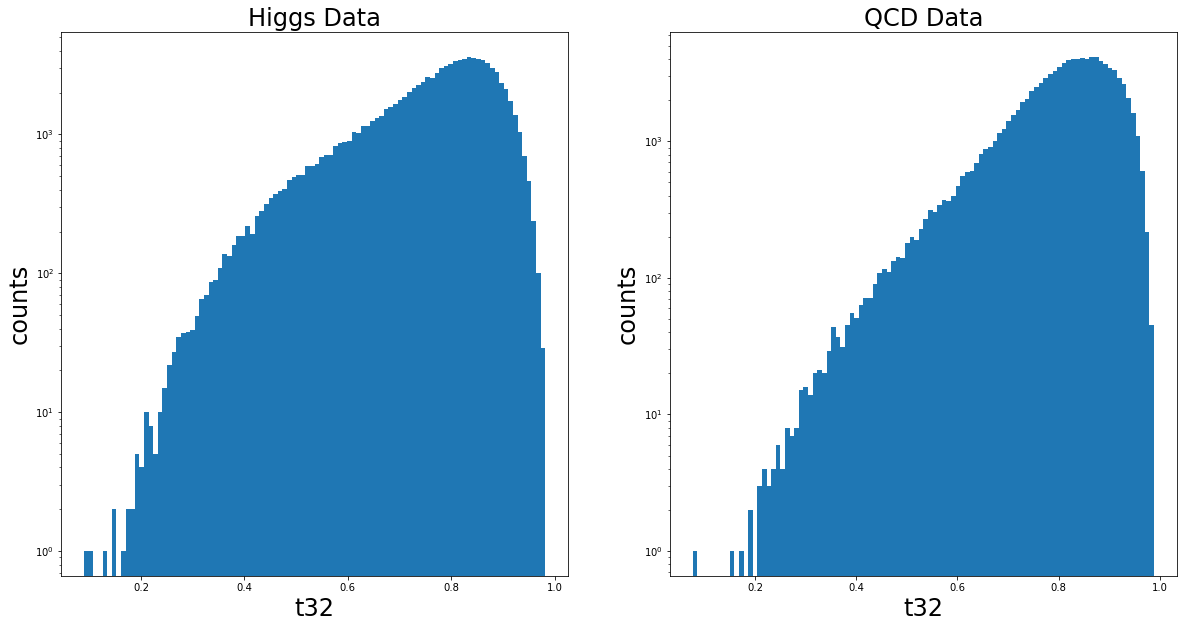

In [72]:
makeHists('t21', 100)
makeHists('t32', 100)

Angularity is measure of the distribution of energy flow inside of a jet. It is therfore a useful characteristic in determining the presence of subjets within a jet constrained by radius R. It measures the amount of energy distributed away from the central axis of the jet.

$$
\tau  = \frac{1}{M}\sum_i E_i \sin \theta_i (1-\cos \theta_i)
$$

where M is the jet mass and E_i is the energy of the ith constituent and $\theta_i $ is the angle between the central jet axis and the ith constituets trajectory

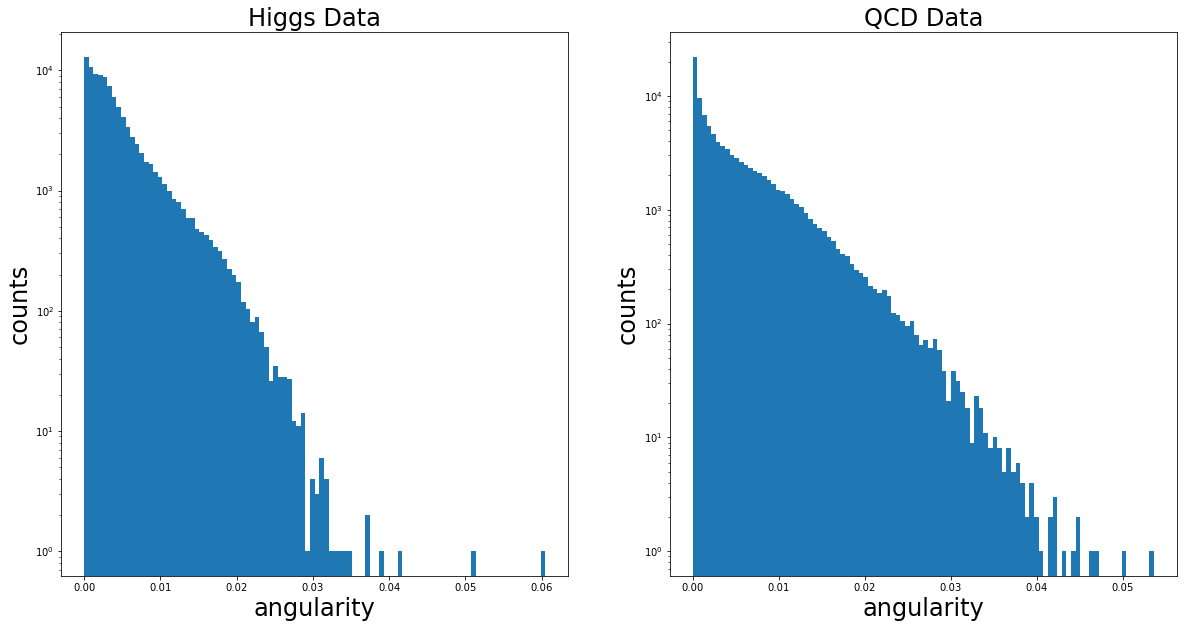

In [73]:
makeHists('angularity', 100)

Finally $k_t\Delta R$ Is a measure of the distance between two subjets within the large-R jet. The quantity R defines the solid angle in $\eta$, $\phi$ space that an individual jet takes up. 

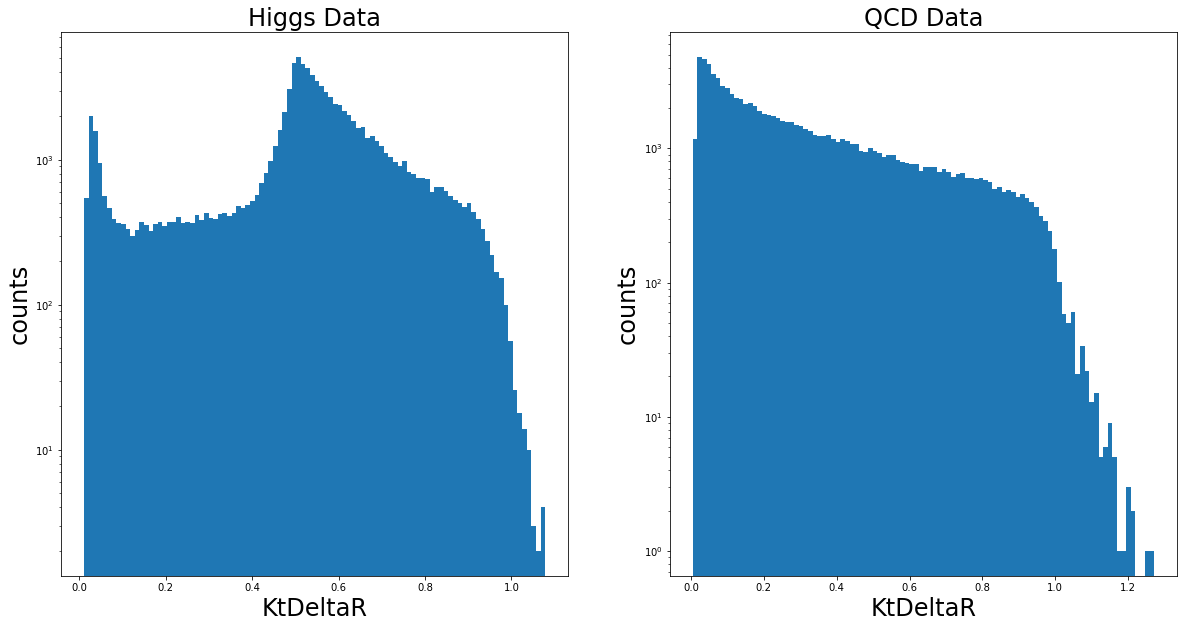

In [75]:
makeHists('KtDeltaR', 100)

#### Correlations
In general the data is correlated since many of the substructure 

In [107]:
def make2dHists(name1, name2, bins):
    """
    Create a histogram and a semiLog histogram for some imput data that looks like
    the plots above
    
    bins: [array] the number of bins in each axis
    
    Name: a string, the name of the column to be histogrammed
    """
    fig, ax = plt.subplots(1,2, figsize = (20,10))
    
    for i in range(2):
        ax[i].hist2d(data[i][name1], data[i][name2], bins)
        ax[i].set_title(titles[i], fontsize = 24)
        ax[i].set_xlabel(f'{name1}', fontsize = 24)
        ax[i].set_ylabel(f'{name2}', fontsize = 24)

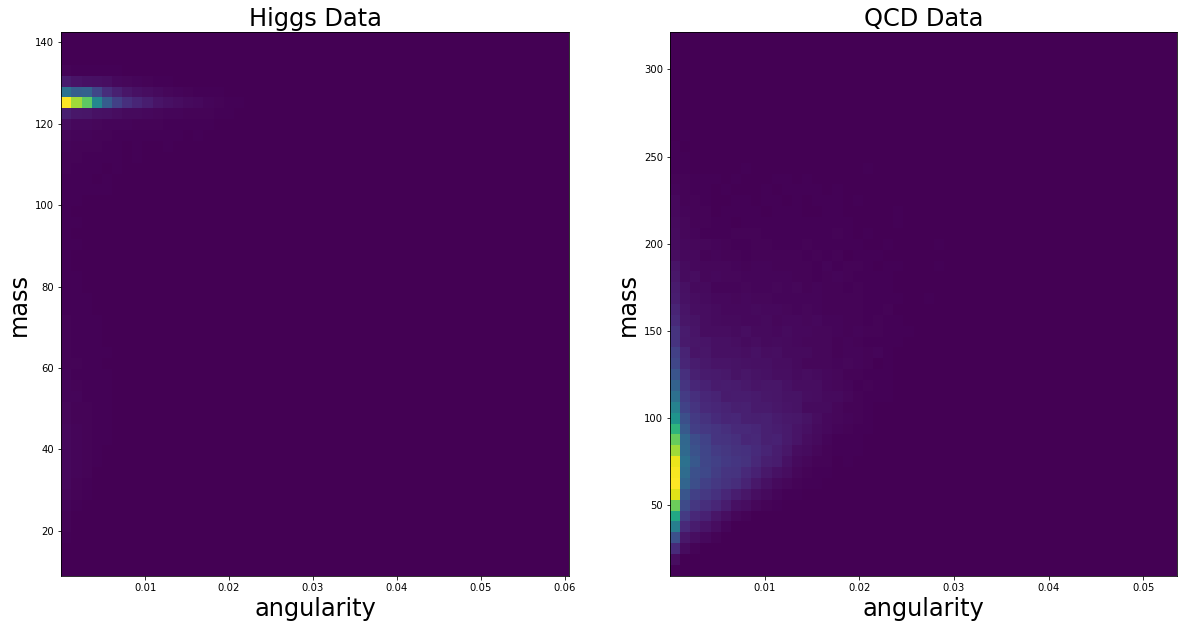

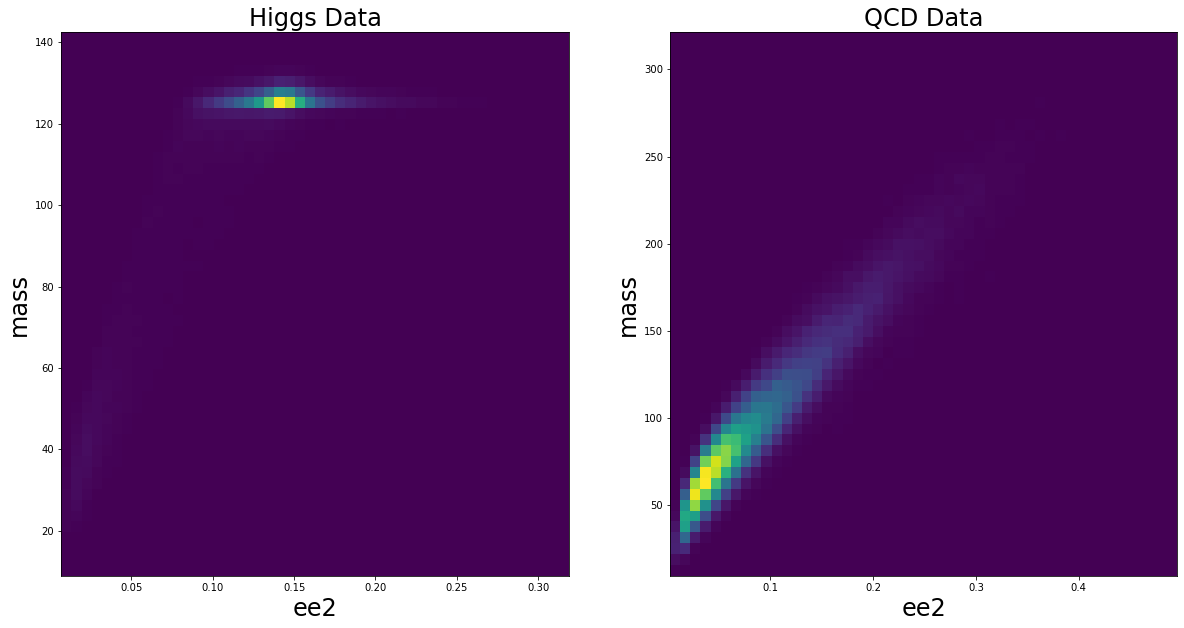

In [108]:
make2dHists('angularity', 'mass', [50,50])
make2dHists('ee2', 'mass', [50,50])